# Mittelstufenprojekt: Revision Rossmann Store Sales

Rossmann betreibt über 4.500 Drogeriemärkte in sieben europäischen Ländern. Bis 2015 etwa mussten die Filialleiter von Rossmann ihre täglichen Umsätze bis zu sechs Wochen im Voraus prognostizieren. Die Umsätze in den Filialen werden von vielen Faktoren beeinflusst, wie z. B. Werbeaktionen, Wettbewerb, Schulferien und Feiertage, Saisonabhängigkeit und örtliche Gegebenheiten. Bei Tausenden von Managern, die ihre Umsätze auf der Grundlage ihrer individuellen Situation vorhersagen, kann die Genauigkeit der Ergebnisse sehr unterschiedlich sein. Dazu wurde vor dem Jahreswechsel 2015/2016 ein Wettbewerb ausgeschrieben, bei dem die Teilnehmer ihre Vorhersagen für die nächsten sechs Wochen abgeben sollten. Rossmann hat die Daten für den Wettbewerb anonymisiert und veröffentlicht. Die Daten enthalten über 1,5 Millionen tägliche Umsätze für 1.115 Rossmann Filialen in Deutschland.

Aufgabe ist es nun, die Umsätze für die nächsten sechs Wochen vorherzusagen. Die Daten für den Wettbewerb sind in der Datei `train.csv` enthalten. Die Datei `test.csv` enthält die Daten für die sechs Wochen, für die die Umsätze vorhergesagt werden sollen. Die Datei `store.csv` enthält zusätzliche Informationen über die einzelnen Filialen.

In [33]:
# Basic Functionalities
from IPython.display import Image
import time
from pprint import pprint
from tqdm import tqdm

# Working with Data
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

# max rows and columns to display
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## 1. Data Preparation and Feature Engineering

In [34]:
train_df = pd.read_csv('input-rss/train.csv', low_memory=False)
store_df = pd.read_csv('input-rss/store.csv')
test_df = pd.read_csv('input-rss/test.csv')

In [35]:
print(store_df.info()) 
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dty

In [36]:
train_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[1017209 rows x 9 columns]

In [37]:
test_df

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
41083              0  
41084              0  
41085              0  
41086              0  
41087              1  

[41088 rows x 8 columns]

In [38]:
store_df

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
...                         ...                       ...     ...   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
...               ...              ...               ...  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[1115 rows x 10 columns]

### 1.2 Merge Data Sets

EDIT (21.06.23): Die Datei `store.csv` enthält zusätzliche Informationen über die einzelnen Filialen. Diese werden in die Datei `train.csv` integriert.

In [39]:
train_store = train_df.merge(store_df, how='left', on='Store')
test_store = test_df.merge(store_df, how='left', on='Store')

In [40]:
def get_date_parts(df, date_col):
    '''return a df with date parts:
    - day of week
    - week of year
    - month
    - day of month
    - day of year
    - year
    - quarter
    - is_weekend
    - is_quarter_start
    - is_quarter_end
    - is_year_start
    - is_year_end
    - is_month_start
    - is_month_end'''

    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df['day_of_week'] = df[date_col].dt.dayofweek
    df['week_of_year'] = df[date_col].dt.weekofyear
    df['month'] = df[date_col].dt.month
    df['day_of_month'] = df[date_col].dt.day
    df['day_of_year'] = df[date_col].dt.dayofyear
    df['year'] = df[date_col].dt.year
    df['quarter'] = df[date_col].dt.quarter
    df['is_weekend'] = np.where(df[date_col].dt.dayofweek.isin([5,6]), 1, 0)
    df['is_quarter_start'] = df[date_col].dt.is_quarter_start.astype(int)
    df['is_quarter_end'] = df[date_col].dt.is_quarter_end.astype(int)
    df['is_year_start'] = df[date_col].dt.is_year_start.astype(int)
    df['is_year_end'] = df[date_col].dt.is_year_end.astype(int)
    df['is_month_start'] = df[date_col].dt.is_month_start.astype(int)
    df['is_month_end'] = df[date_col].dt.is_month_end.astype(int)
    return df

In [41]:
merged_train = get_date_parts(train_store, 'Date')
merged_test = get_date_parts(test_store, 'Date')

merged_train

/var/folders/_y/hzd68ny17rsfgx2sq7wtmxcw0000gn/T/ipykernel_1030/2398340480.py:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df[date_col].dt.weekofyear
/var/folders/_y/hzd68ny17rsfgx2sq7wtmxcw0000gn/T/ipykernel_1030/2398340480.py:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df[date_col].dt.weekofyear


Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        NaN                       NaN       0   
1017207                        NaN                       NaN       0   
1017208                        NaN                       NaN       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  day_of_week  \
0                    NaN              NaN               NaN            4   
1                   13.0           2010.0   Jan,Apr,Jul,Oct            4   
2                   14.0           2011.0   Jan,Apr,Jul,Oct            4   
3                    NaN              NaN               NaN            4   
4                    NaN              NaN               NaN            4   
...                  ...              ...               ...          ...   
1017204             31.0           2013.0   Jan,Apr,Jul,Oct            1   
1017205              NaN              NaN               NaN            1   
1017206              NaN              NaN               NaN            1   
1017207              NaN              NaN               NaN            1   
1017208             22.0           2012.0  Mar,Jun,Sept,Dec            1   

         week_of_year  month  day_of_month  day_of_year  year  quarter  \
0                  31      7            31          212  2015        3   
1                  31      7            31          212  2015        3   
2                  31      7            31          212  2015        3   
3                  31      7            31          212  2015        3   
4                  31      7       

In [42]:
merged_train.groupby(by='Open')['Sales'].sum()

Open
0             0
1    5873180623
Name: Sales, dtype: int64

EDIT (21.06.23): Der Umsatz ist immer 0, wenn das Geschäft geschlossen ist. Deswegen später mit einer if-Abfrage die geschlossenen Geschäfte herausfiltern.

In [43]:
merged_train = merged_train[merged_train['Open'] == 1].copy() 
merged_train.groupby(by='Open')['Sales'].sum()

Open
1    5873180623
Name: Sales, dtype: int64

In [44]:
def comp_months(df):
    df = df.copy()
    df['CompetitionOpen'] = 12 * (df['year'] - df['CompetitionOpenSinceYear']) + (df['month'] - df['CompetitionOpenSinceMonth'])
    df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x: x if x > 0 else 0).fillna(0)
    df = df.drop(columns=['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'])
    return df

merged_train = comp_months(merged_train)
merged_test = comp_months(merged_test)

merged_train

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016776    682          2 2013-01-01   3375        566     1      0   
1016827    733          2 2013-01-01  10765       2377     1      0   
1016863    769          2 2013-01-01   5035       1248     1      0   
1017042    948          2 2013-01-01   4491       1039     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1016776            a              1         b          a                150.0   
1016827            a              1         b          b                860.0   
1016863            a              1         b          b                840.0   
1017042            a              1         b          b               1430.0   
1017190            a              1         b          b                720.0   

         Promo2  Promo2SinceWeek  Promo2SinceYear    PromoInterval  \
0             0              NaN              NaN              NaN   
1             1             13.0           2010.0  Jan,Apr,Jul,Oct   
2             1             14.0           2011.0  Jan,Apr,Jul,Oct   
3             0              NaN              NaN              NaN   
4             0              NaN              NaN              NaN   
...         ...              ...              ...              ...   
1016776       0              NaN              NaN              NaN   
1016827       0              NaN              NaN              NaN   
1016863       1             48.0           2012.0  Jan,Apr,Jul,Oct   
1017042       0              NaN              NaN              NaN   
1017190       0              NaN              NaN              NaN   

         day_of_week  week_of_year  month  day_of_month  day_of_year  year  \
0                  4            31      7            31          212  2015   
1                  4            31      7            31          212  2015   
2                  4            31      7            31          212  2015   
3                  4            31      7            31          212  2015   
4                  4            31      7            31          212  2015   
...              ...           ...    ...           ...          ...   ...   
1016776            1             1      1             1            1  2013   
1016827            1             1      1             1            1  2013   
1016863            1             1      1             1            1  2013   
1017042            1             1      1             1            1  2013   
1017190            1             1      1             1            1  2013   

         quarter  is_weekend  is_quarter_start  is_quarter_end  is_year_start  \
0              3           0                 0               0              0   
1              3           0                 0               0              0   
2              3           0                 0               0              0   
3              3           0                 0               0              0   


In [45]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                    7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['month']] in months:
            return 1
        else:
            return 0
        
    except Exception:
        return 0
    
def promo_cols(df):
    df = df.copy()
    df['Promo2Open'] = 12 * (df['year'] - df['Promo2SinceYear']) + (df['week_of_year'] - df['Promo2SinceWeek']) / 4.0
    df['Promo2Open'] = df['Promo2Open'].apply(lambda x: x if x > 0 else 0).fillna(0)
    df['IsPromoMonth'] = df.apply(lambda row: check_promo_month(row), axis=1)
    df = df.drop(columns=['Promo2SinceYear', 'Promo2SinceWeek'])
    return df

merged_train = promo_cols(merged_train)
merged_test = promo_cols(merged_test)

merged_train

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016776    682          2 2013-01-01   3375        566     1      0   
1016827    733          2 2013-01-01  10765       2377     1      0   
1016863    769          2 2013-01-01   5035       1248     1      0   
1017042    948          2 2013-01-01   4491       1039     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1016776            a              1         b          a                150.0   
1016827            a              1         b          b                860.0   
1016863            a              1         b          b                840.0   
1017042            a              1         b          b               1430.0   
1017190            a              1         b          b                720.0   

         Promo2    PromoInterval  day_of_week  week_of_year  month  \
0             0              NaN            4            31      7   
1             1  Jan,Apr,Jul,Oct            4            31      7   
2             1  Jan,Apr,Jul,Oct            4            31      7   
3             0              NaN            4            31      7   
4             0              NaN            4            31      7   
...         ...              ...          ...           ...    ...   
1016776       0              NaN            1             1      1   
1016827       0              NaN            1             1      1   
1016863       1  Jan,Apr,Jul,Oct            1             1      1   
1017042       0              NaN            1             1      1   
1017190       0              NaN            1             1      1   

         day_of_month  day_of_year  year  quarter  is_weekend  \
0                  31          212  2015        3           0   
1                  31          212  2015        3           0   
2                  31          212  2015        3           0   
3                  31          212  2015        3           0   
4                  31          212  2015        3           0   
...               ...          ...   ...      ...         ...   
1016776             1            1  2013        1           0   
1016827             1            1  2013        1           0   
1016863             1            1  2013        1           0   
1017042             1            1  2013        1           0   
1017190             1            1  2013        1           0   

         is_quarter_start  is_quarter_end  is_year_start  is_year_end  \
0                       0               0              0            0   
1                       0               0              0            0   
2                       0               0              0            0   
3                       0               0              0            0   
4                       0               0              0            0   
...                   ...             ...            ...          ...   
1016776                 1               0         

In [46]:
# adding a new column avg_customer to the dataframe
def avg_customer(df):
    df = df.copy()
    avg_customer = df.groupby(by='Store')['Customers'].mean()
    avg_customer = pd.DataFrame(avg_customer).reset_index()
    avg_customer.columns = ['Store', 'AvgCustomers']
    df = df.merge(avg_customer, how='left', on='Store')
    return df, avg_customer

def avg_customer_spent(df):
    df = df.copy()
    avg_customer_spent = df.groupby(by='Store')['Sales'].mean()
    avg_customer_spent = pd.DataFrame(avg_customer_spent).reset_index()
    avg_customer_spent.columns = ['Store', 'AvgCustomerSpent']
    df = df.merge(avg_customer_spent, how='left', on='Store')
    return df, avg_customer_spent

merged_train, avg_customer_store = avg_customer(merged_train)
merged_train, avg_customer_spent_store = avg_customer_spent(merged_train)

merged_train

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0           1          5 2015-07-31   5263        555     1      1   
1           2          5 2015-07-31   6064        625     1      1   
2           3          5 2015-07-31   8314        821     1      1   
3           4          5 2015-07-31  13995       1498     1      1   
4           5          5 2015-07-31   4822        559     1      1   
...       ...        ...        ...    ...        ...   ...    ...   
844387    682          2 2013-01-01   3375        566     1      0   
844388    733          2 2013-01-01  10765       2377     1      0   
844389    769          2 2013-01-01   5035       1248     1      0   
844390    948          2 2013-01-01   4491       1039     1      0   
844391   1097          2 2013-01-01   5961       1405     1      0   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                 0              1         c          a               1270.0   
1                 0              1         a          a                570.0   
2                 0              1         a          a              14130.0   
3                 0              1         c          c                620.0   
4                 0              1         a          a              29910.0   
...             ...            ...       ...        ...                  ...   
844387            a              1         b          a                150.0   
844388            a              1         b          b                860.0   
844389            a              1         b          b                840.0   
844390            a              1         b          b               1430.0   
844391            a              1         b          b                720.0   

        Promo2    PromoInterval  day_of_week  week_of_year  month  \
0            0              NaN            4            31      7   
1            1  Jan,Apr,Jul,Oct            4            31      7   
2            1  Jan,Apr,Jul,Oct            4            31      7   
3            0              NaN            4            31      7   
4            0              NaN            4            31      7   
...        ...              ...          ...           ...    ...   
844387       0              NaN            1             1      1   
844388       0              NaN            1             1      1   
844389       1  Jan,Apr,Jul,Oct            1             1      1   
844390       0              NaN            1             1      1   
844391       0              NaN            1             1      1   

        day_of_month  day_of_year  year  quarter  is_weekend  \
0                 31          212  2015        3           0   
1                 31          212  2015        3           0   
2                 31          212  2015        3           0   
3                 31          212  2015        3           0   
4                 31          212  2015        3           0   
...              ...          ...   ...      ...         ...   
844387             1            1  2013        1           0   
844388             1            1  2013        1           0   
844389             1            1  2013        1           0   
844390             1            1  2013        1           0   
844391             1            1  2013        1           0   

        is_quarter_start  is_quarter_end  is_year_start  is_year_end  \
0                      0               0              0            0   
1                      0               0              0            0   
2                      0               0              0            0   
3                      0               0              0            0   
4                      0               0              0            0   
...                  ...             ...            ...          ...   
844387                 1               0              1            0   
844388                 1        

In [47]:
merged_train.drop(columns=['Date', 'Customers', 'Open', 'PromoInterval', 'Promo'], inplace=True)

In [48]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  int64  
 1   DayOfWeek            844392 non-null  int64  
 2   Sales                844392 non-null  int64  
 3   StateHoliday         844392 non-null  object 
 4   SchoolHoliday        844392 non-null  int64  
 5   StoreType            844392 non-null  object 
 6   Assortment           844392 non-null  object 
 7   CompetitionDistance  842206 non-null  float64
 8   Promo2               844392 non-null  int64  
 9   day_of_week          844392 non-null  int64  
 10  week_of_year         844392 non-null  int64  
 11  month                844392 non-null  int64  
 12  day_of_month         844392 non-null  int64  
 13  day_of_year          844392 non-null  int64  
 14  year                 844392 non-null  int64  
 15  quarter          

In [49]:
merged_train['CompetitionDistance']=merged_train['CompetitionDistance'].fillna(merged_train['CompetitionDistance'].max())*1

In [50]:
categories = ['DayOfWeek', 'StoreType', 'Assortment', 'quarter', 'StateHoliday']

In [51]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(merged_train[categories])
encoded_cols = list(encoder.get_feature_names_out(categories))
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c',
 'quarter_1',
 'quarter_2',
 'quarter_3',
 'quarter_4',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c']

In [52]:
merged_train[encoded_cols] = encoder.transform(merged_train[categories])
merged_test[encoded_cols] = encoder.transform(merged_test[categories])

In [53]:
merged_train.drop(columns=categories, inplace=True)
merged_test.drop(columns=categories, inplace=True)

In [54]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  int64  
 1   Sales                844392 non-null  int64  
 2   SchoolHoliday        844392 non-null  int64  
 3   CompetitionDistance  844392 non-null  float64
 4   Promo2               844392 non-null  int64  
 5   day_of_week          844392 non-null  int64  
 6   week_of_year         844392 non-null  int64  
 7   month                844392 non-null  int64  
 8   day_of_month         844392 non-null  int64  
 9   day_of_year          844392 non-null  int64  
 10  year                 844392 non-null  int64  
 11  is_weekend           844392 non-null  int64  
 12  is_quarter_start     844392 non-null  int64  
 13  is_quarter_end       844392 non-null  int64  
 14  is_year_start        844392 non-null  int64  
 15  is_year_end      

## 2. Exploratory Data Analysis

<AxesSubplot: xlabel='Sales', ylabel='Count'>

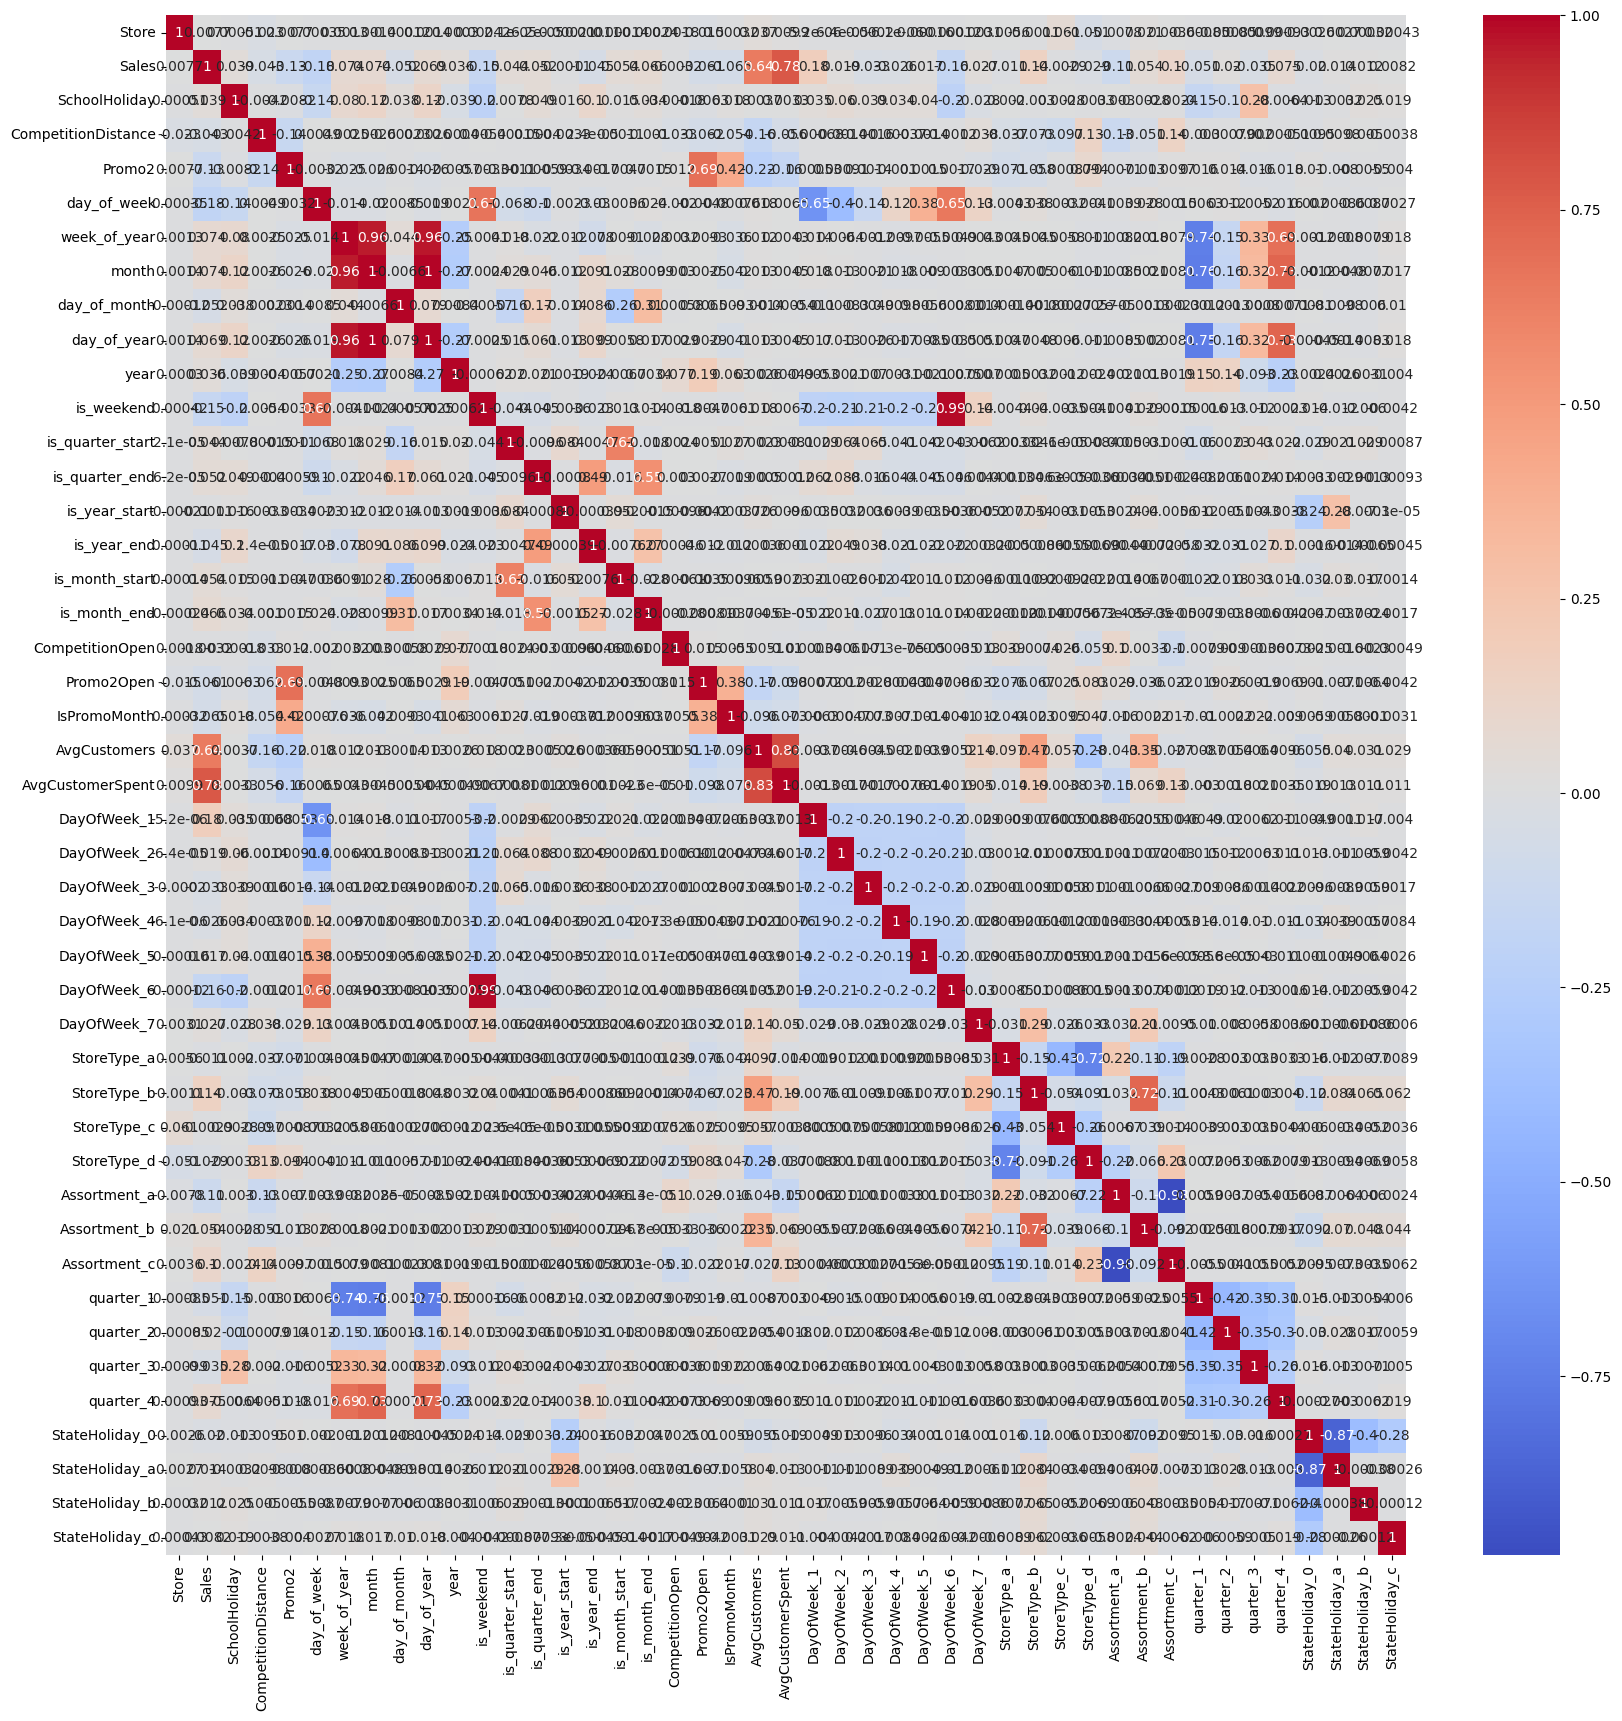

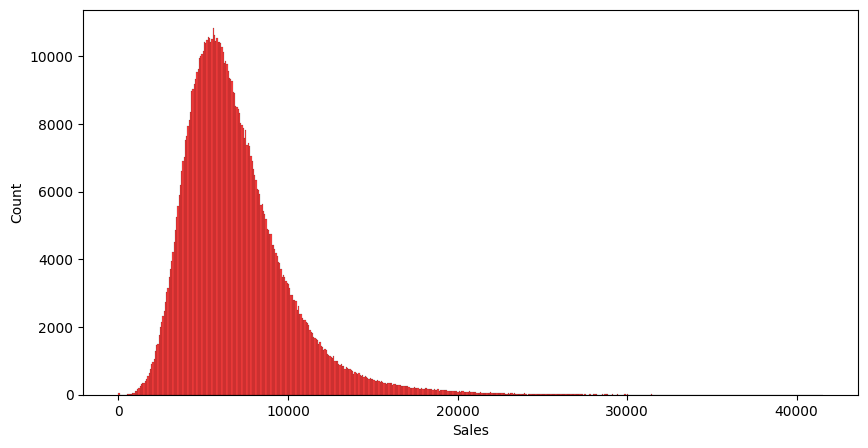

In [55]:
# exploratory data analysis
# correlation matrix
corr = merged_train.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# checking the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(merged_train['Sales'], color='r')

<AxesSubplot: xlabel='CompetitionDistance', ylabel='Sales'>

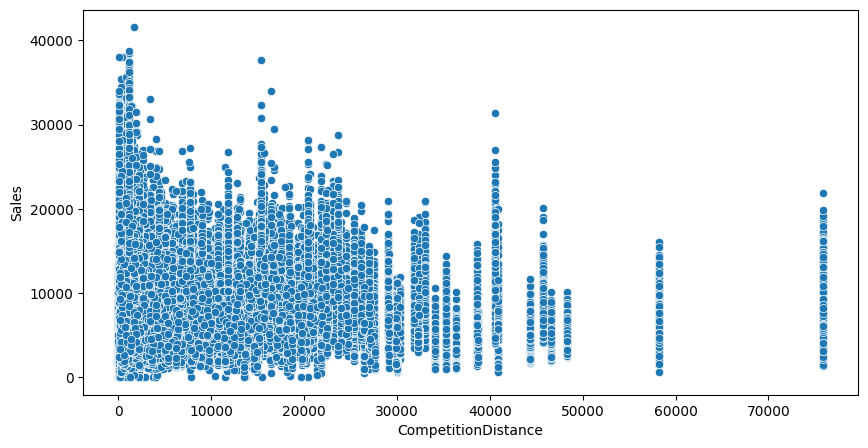

In [70]:
# competition distance vs sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=merged_train)


## 3. Modelling

In [ ]:
# define a function that describes the performance of the model with root mean squared percentage error
def rmspe(y_true, y_pred):
    '''root mean squared percentage error'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100



### 3.1 k-Nearest Neighbors

### 3.2 Logistic Regression

### 3.3 Random Forest

### 3.4 Decision Tree

### 3.5 AdaBoost

### 3.6 Support Vector Machine

### 3.7 Gradient Boost

### 3.8 XGBoost

## 4. Hyperparameter Tuning

Zuvor wurden erste Einblicke in die Feature Importance vorgenommen. Bei den Sales der Rossmann stores spielt "Open" selbstverständlich eine Schlüsselrolle. Wäre der einzelne Store geschlossen, gäbe es auch keinen Umsatz. Durchschnittlich spielt "Promo" eine - wenn auch geringe - Rolle. "StateHoliday" und "SchoolHoliday" üben hingegen keinen Einfluss auf den Umsatz aus. Bei AdaBoost und dem Decision Tree Model hat der Store Type einen vergleichsweise hohen Stellenwert. Um die Feature Importance abschließend zu bewerten, werden im nächsten Schritt die Hyperparameter einzelner Modelle optimiert:

Bevor dies geschieht, wurde die Performance der Modelle mit Standardwerten gemessen. Die Ergebnisse sind in der folgenden Tabelle zusammengefasst.
Die performantesten Modelle werden mit GridSearchCV optimiert, erkennbar an dem ☑ in der Spalte "Hyperparameter Tuning?".

| Model      | Performance | Hyperparameter Tuning?     |
| ---:        |    :----   |          :---: |
| k=5-Nearest Neighbors      | Training set score: 0.73<br>Test set score: 0.46<br>Average Error: 0.4856 degrees<br>RMSE = 0.73| ☑ |
| Logistic Regression   |Training set score: 0.54<br>Test set score: 0.54<br>Average Error: 1770.6203 degrees<br>RMSE = 2614.55|ist im Mittelfeld, daher (vorerst nicht)|
| Random Forest   |Training set score: 0.96<br>Test set score: 0.81<br>Average Error: 918.4684 degrees<br>RMSE = 1664.91| ☑ |
| Decision Tree   |Training set score: 1.00<br>Test set score: 0.76<br>Average Error: 980.4904 degrees<br>RMSE = 1883.05| ☑ |
| AdaBoost   |Training set score: -1.01<br>Test set score: -1.01<br>Average Error: 4536.4523 degrees<br>RMSE = 5454.02|bildet das Schlusslicht|
| Support Vector Machine   |Training set score: -2.38<br>Test set score: -2.39<br>Average Error: 6296.8523 degrees<br>RMSE = 7081.73|bildet das Schlusslicht|
| Gradient Boost   |Training set score: 0.63<br>Test set score: 0.63<br>Average Error: 1592.3597 degrees<br>RMSE = 2338.12|ist im Mittelfeld, daher (vorerst nicht)|
| XGBoost   |Training set score: 0.86<br>Test set score: 0.86<br>Average Error: 999.5601 degrees<br>RMSE = 1438.61| ☑ |

Nach der Optimierung soll die Performance der einzelnen Modelle mit den Testdaten gemessen werden. Außerdem wird die Feature Importance der einzelnen Modelle nochmals betrachtet - sofern möglich. Die Darstellung der "Actual VS Predicted Sales" erfolgte zunächst mit dem Seaborn Scatterplot, später wird das regplot getestet.

In [ ]:
# define a function to plot predicted vs actual values
def plot_predicted_vs_actual(model, X, y):
    # cross_val_predict returns an array of the same size as `y` where each entry
    # is a prediction obtained by cross validation:
    predicted = cross_val_predict(model, X, y, cv=10)

    sns.set_theme(style="whitegrid")
    plt.style.use('fivethirtyeight')

    plt.figure(figsize=(12,12))
    sns.regplot(x=y, y=predicted, truncate=True, scatter_kws={'alpha': 0.1, 's':2}, line_kws={'alpha': 0.5, 'label':'Regression Line', 'color':'#272727'}, label='Predicted Sales')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], lw=2, label='Perfect Prediction', color='#ab2425', alpha=.5)
    plt.xlabel('Actual [$]')
    plt.ylabel('Predicted [$]')
    plt.legend()

    title = '{}: Actual vs Predicted Sales'.format(type(model).__name__)
    sig1 = '__________________________________________________________________________________________________________'
    
    sig2 = '   © NICO BORKOWSKI & LIAM WANDER                                                                                                             Source: Rossmann   '
    plt.title(title, fontsize=26, weight='bold', alpha=.75)
    plt.gcf().text(0.02, 0.02, sig1, fontsize=14, color = 'grey', alpha = .7)
    plt.gcf().text(0.01, 0, sig2, fontsize=14, color = 'grey', alpha = .7)

    plt.show()

### 4.1 Tuning k-Nearest Neighbors

Fitting 5 folds for each of 14 candidates, totalling 70 fits
{'n_neighbors': 4}


100%|██████████| 14/14 [04:04<00:00, 17.45s/it]


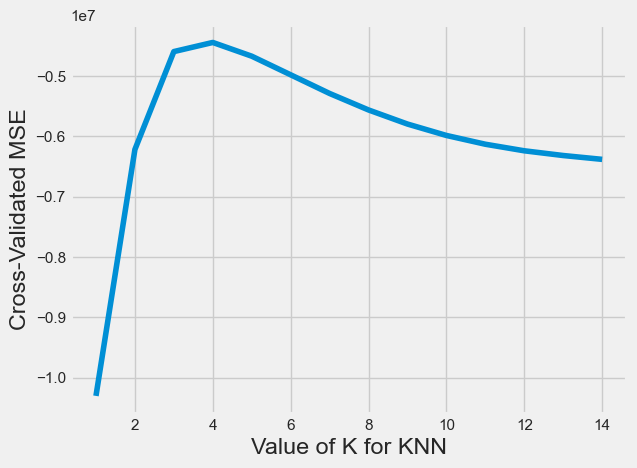

In [ ]:
knn = KNeighborsRegressor()

param_grid = {'n_neighbors': np.arange(1, 15)}

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, verbose=1)
knn_gscv.fit(X_train, y_train)

pprint(knn_gscv.best_params_)

k_range = range(1, 15)
k_scores = []
for k in tqdm(k_range):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

Best K=2 Neighbors. Alles 'drunter und drüber ist weitaus weniger performant. (EDIT 30. März; Nach dem belassen der Daten beim Original ist der beste Wert für K=4)

Training set score: 0.82
Test set score: 0.71
Average Error: 1447.5529 degrees
RMSE = 2086.13


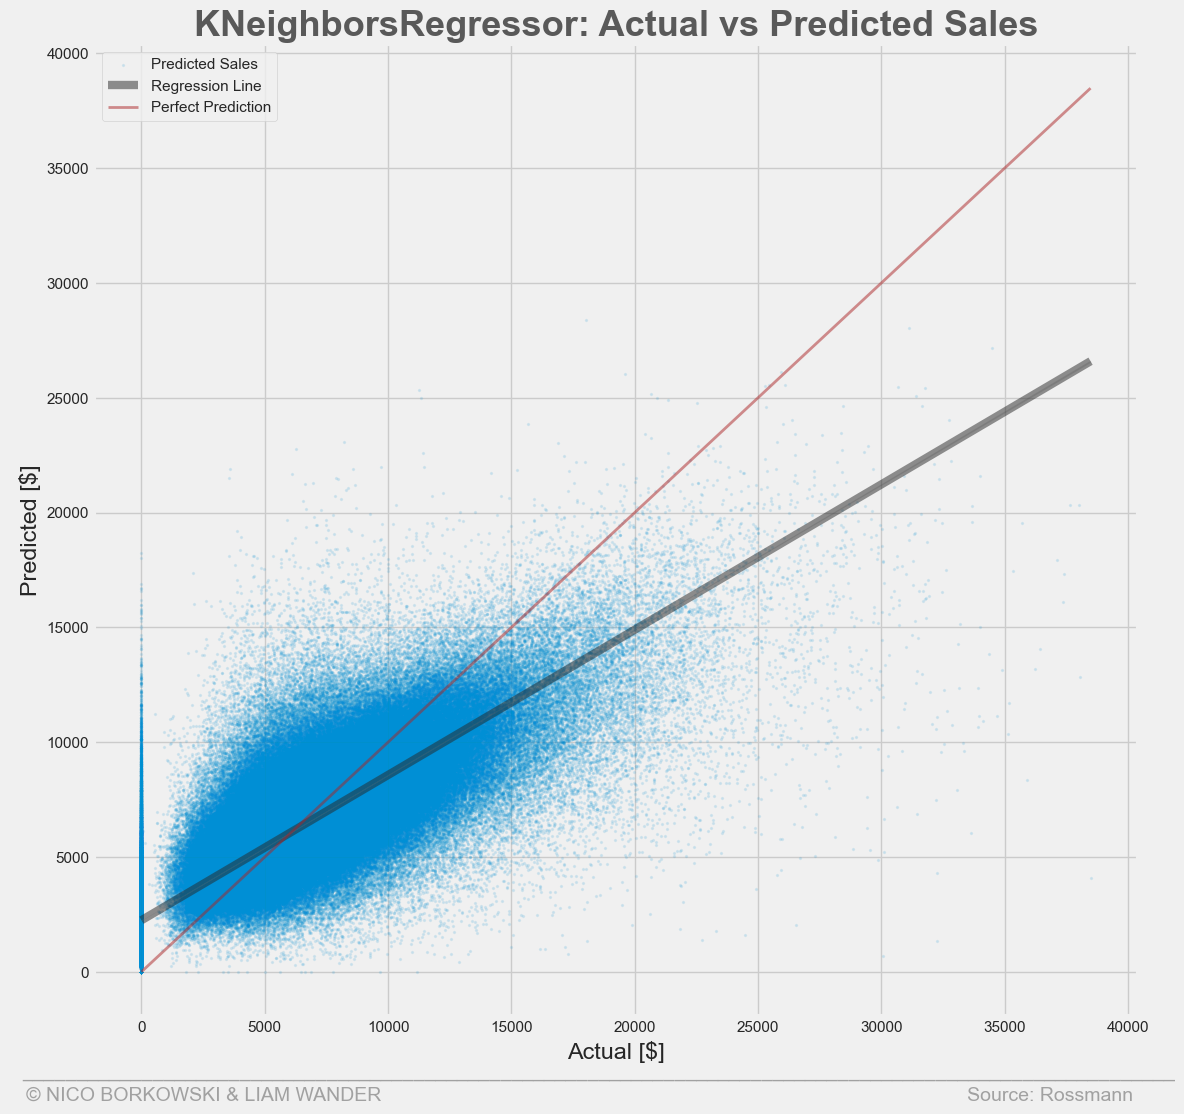

In [ ]:
knn = KNeighborsRegressor(n_neighbors=4)
knn = train_evaluate(knn, X_train, y_train, X_test, y_test)

plot_predicted_vs_actual(knn, X_train, y_train)

### 4.2 Tuning the Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators': [50, 100, 200],
              'max_features': ['sqrt', 'log2', 'None'],
              'max_depth': [9, 12, 15],
              'max_leaf_nodes': [9, 12, 15]}

rf_gscv = GridSearchCV(rf, param_grid, cv=5, verbose=2)
rf_gscv.fit(X_train, y_train)

pprint(rf_gscv.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, n_estimators=50; total time=   7.0s
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, n_estimators=50; total time=   6.9s
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, n_estimators=50; total time=   6.9s
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, n_estimators=50; total time=   6.8s
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, n_estimators=50; total time=   6.8s
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, n_estimators=100; total time=  13.5s
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, n_estimators=100; total time=  13.5s
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, n_estimators=100; total time=  13.7s
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, n_estimators=100; total time=  13.5s
[CV] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, n_estimators=100; to

/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 341, in fit
    self._validate_params()
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.10/site-pack

{'max_depth': 12,
 'max_features': 'sqrt',
 'max_leaf_nodes': 15,
 'n_estimators': 50}


Training set score: 0.57
Test set score: 0.57
Average Error: 1677.4347 degrees
RMSE = 2524.19


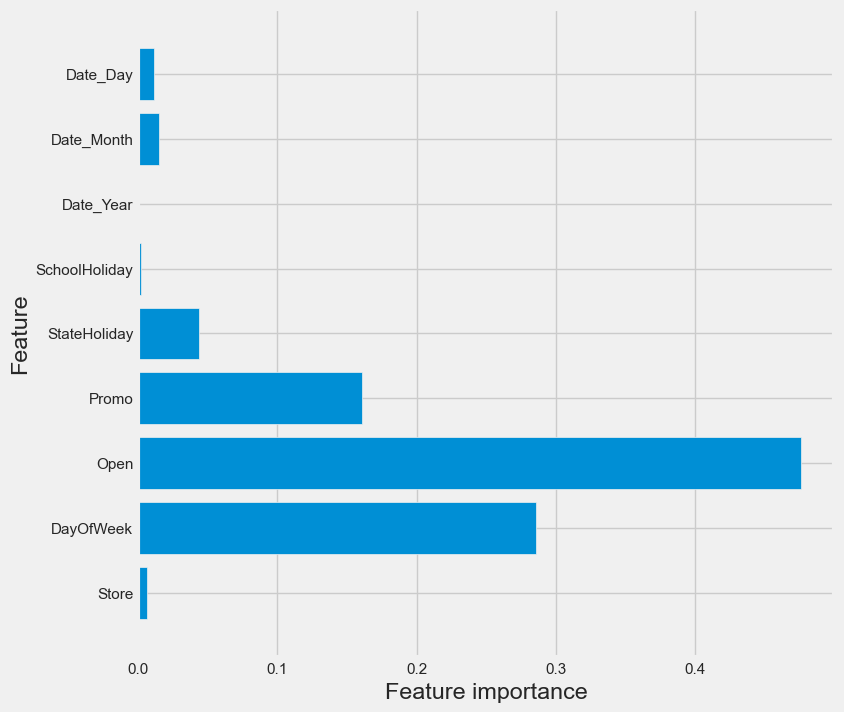

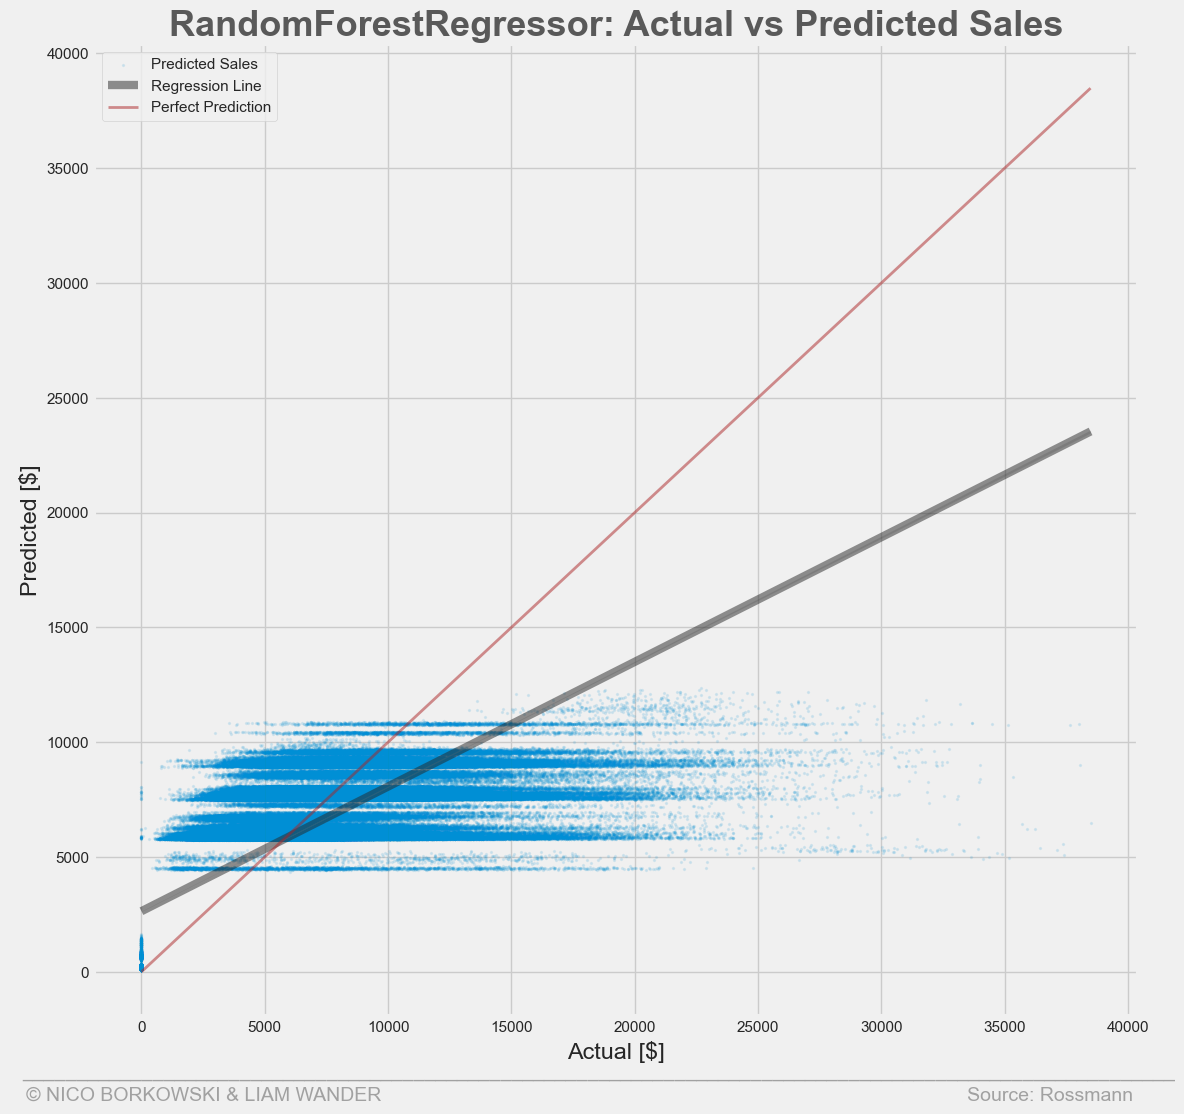

In [ ]:
rf = RandomForestRegressor(n_estimators=50, max_features='sqrt', max_depth=12, max_leaf_nodes=15, random_state=42)
rf = train_evaluate(rf, X_train, y_train, X_test, y_test)

plot_feature_importance(rf)
plot_predicted_vs_actual(rf, X_train, y_train)

Nach der Optimierung der Hyperparameter ist die Performance des Random Forests deutlich gesunken, der Root Mean Squared Error liegt bei 2555.33$“. Auch die Feature Importance lässt zu Wünschen übrig: Der Umsatz ist nach wie vor von der Öffnung und dem Wochentag abhängig.

In [ ]:
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
              'max_features': ['sqrt', 'log2', 'None'],
              'max_depth': [9, 12, 15, 18, 21, 24],
              'max_leaf_nodes': [9, 12, 15, 18, 21, 24]}

random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5, verbose=2)

random_search.fit(X_train, y_train)
pprint(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=24, max_features=log2, max_leaf_nodes=12, n_estimators=400; total time=  58.4s
[CV] END max_depth=24, max_features=log2, max_leaf_nodes=12, n_estimators=400; total time= 1.0min
[CV] END max_depth=24, max_features=log2, max_leaf_nodes=12, n_estimators=400; total time= 1.0min
[CV] END max_depth=24, max_features=log2, max_leaf_nodes=12, n_estimators=400; total time=  59.1s
[CV] END max_depth=24, max_features=log2, max_leaf_nodes=12, n_estimators=400; total time=  59.5s
[CV] END max_depth=9, max_features=None, max_leaf_nodes=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=9, max_features=None, max_leaf_nodes=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=9, max_features=None, max_leaf_nodes=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=9, max_features=None, max_leaf_nodes=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=9, max_features=None, max_leaf_nodes=18, n_est

/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 341, in fit
    self._validate_params()
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.10/site-package

{'max_depth': 21,
 'max_features': 'sqrt',
 'max_leaf_nodes': 24,
 'n_estimators': 100}


Training set score: 0.58
Test set score: 0.58
Average Error: 1660.9261 degrees
RMSE = 2502.93


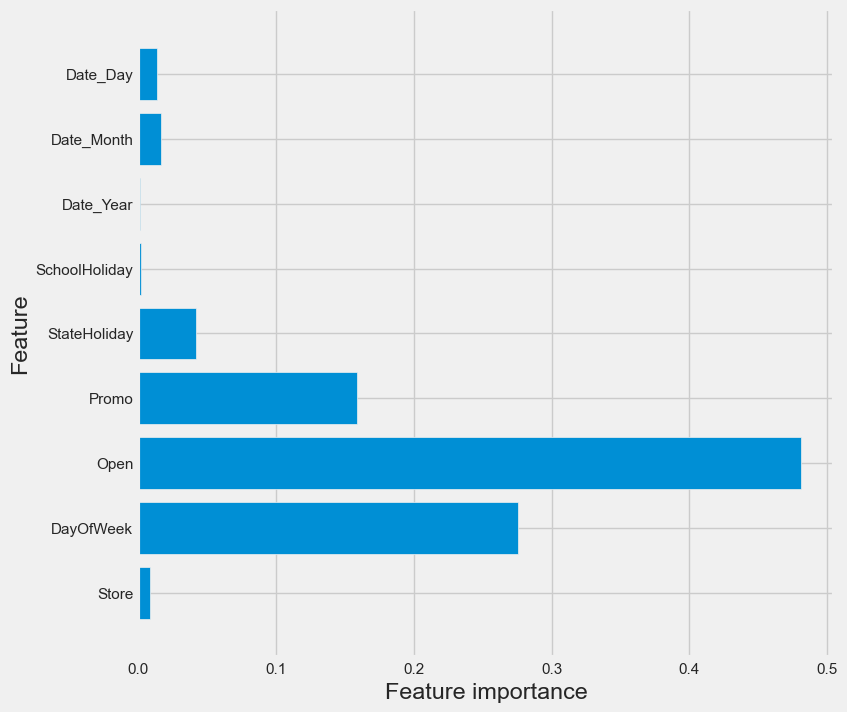

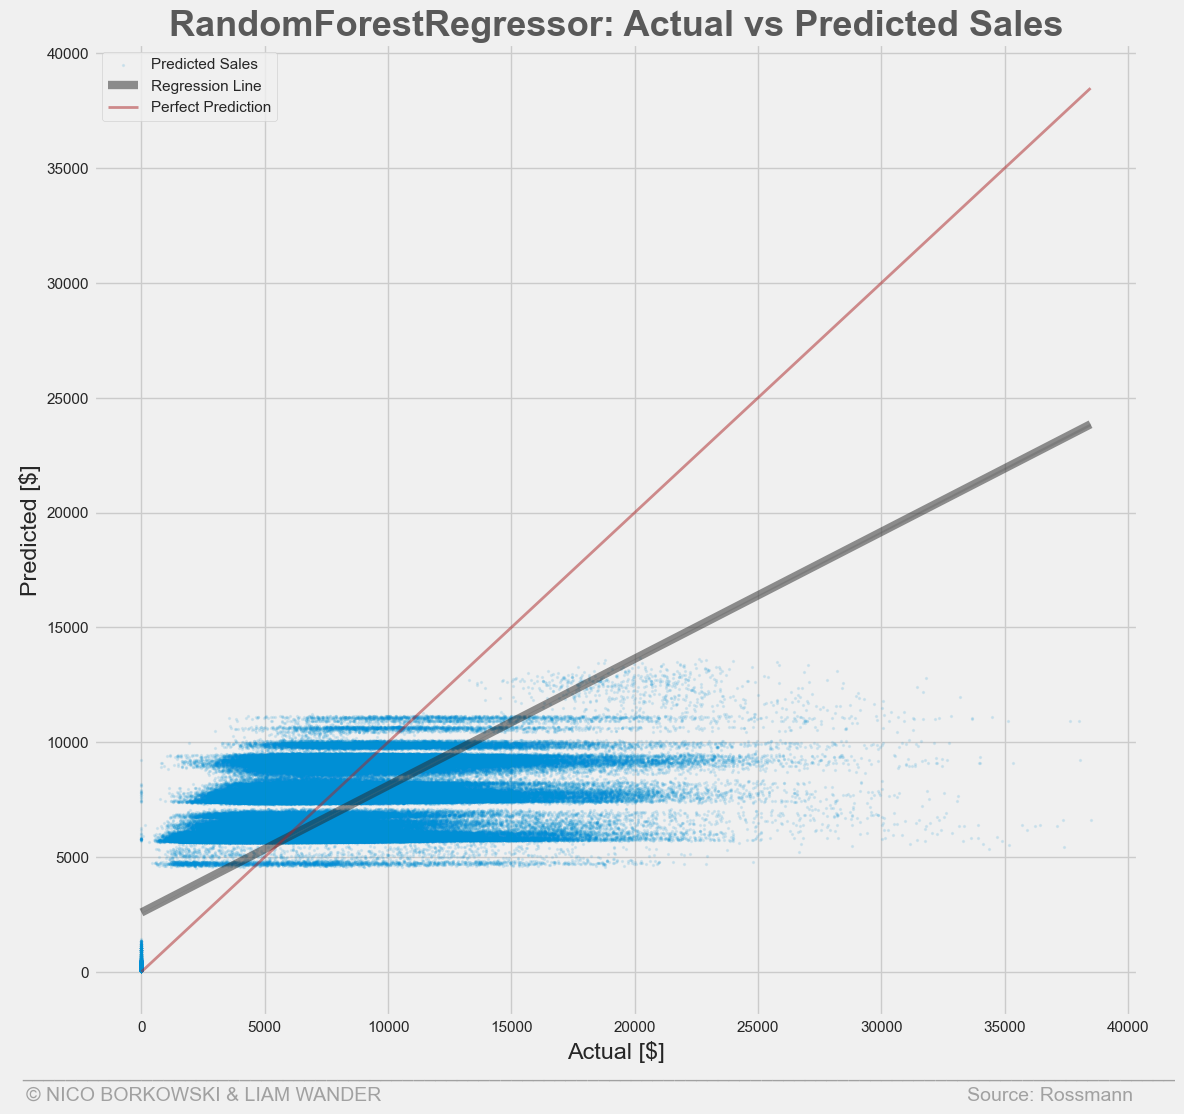

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=21, max_leaf_nodes=24, random_state=42)
rf = train_evaluate(rf, X_train, y_train, X_test, y_test)
plot_feature_importance(rf)
plot_predicted_vs_actual(rf, X_train, y_train)

Training set score: 0.98
Test set score: 0.84
Average Error: 841.5616 degrees
RMSE = 1519.53


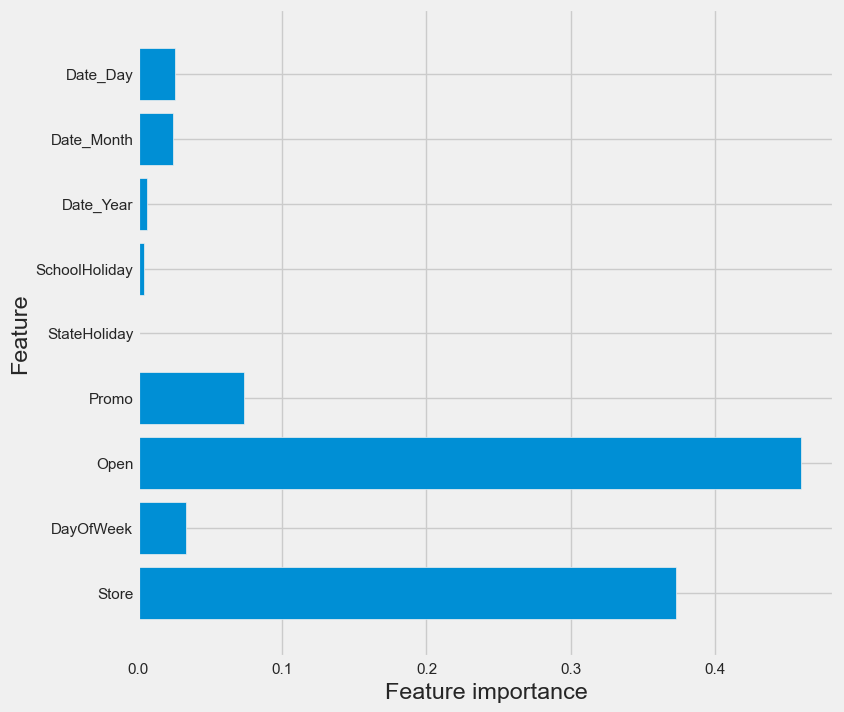

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


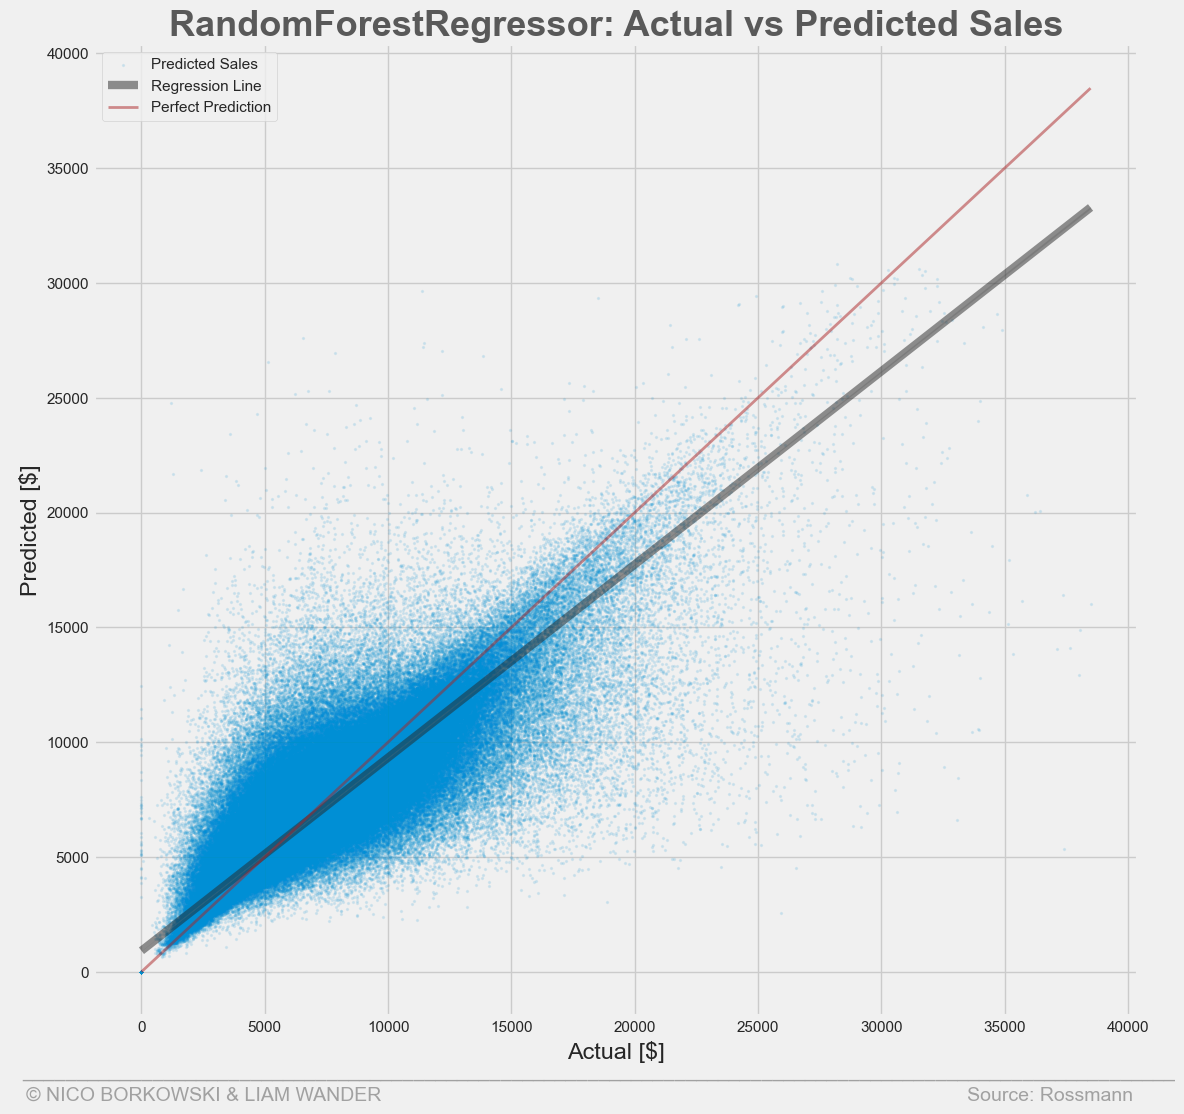

In [ ]:
# print standard parameters of a random forest
rf = RandomForestRegressor(random_state=42)
rf = train_evaluate(rf, X_train, y_train, X_test, y_test)

plot_feature_importance(rf)
pprint(rf.get_params())
plot_predicted_vs_actual(rf, X_train, y_train)

-> Mit den Standardwerten des Random Forests werden mit Abstand die besten Werte erzielt, wobei das ganze eventuell an overfitting grenzt. Aufgrundlage der Feature Importance (Store vs Wochentag) wird letztendlich mit dem getunten random Forest, das Stacking Ensemble gefüttert. Wahrscheinlich bildet das die Realität mehr nach als die Standardwerte.

### 4.3 Tuning the Decision Tree

Training set score: 1.00
Test set score: 0.76
Average Error: 980.4904 degrees
RMSE = 1883.05


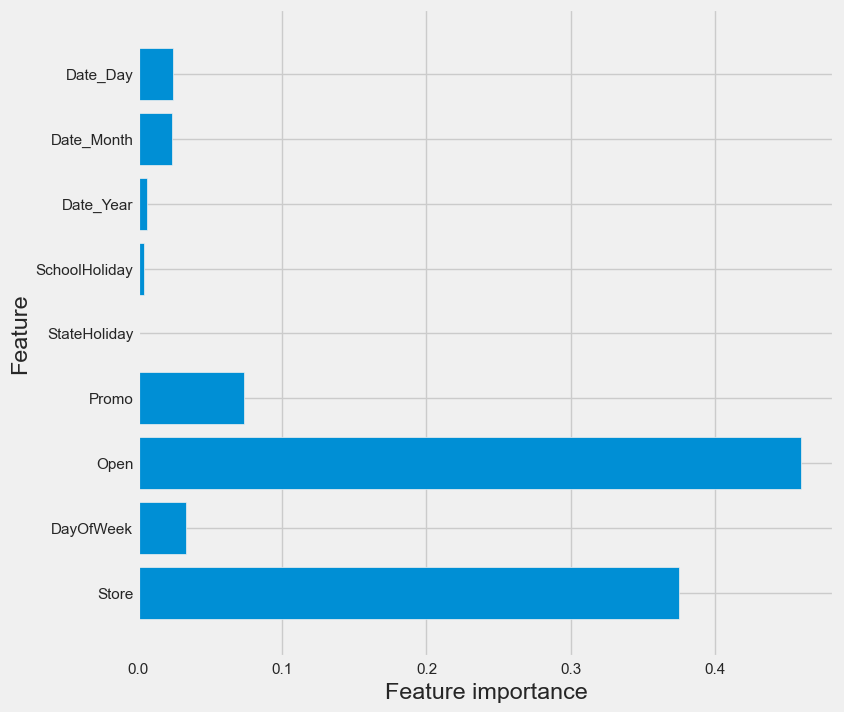

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt = train_evaluate(dt, X_train, y_train, X_test, y_test)
plot_feature_importance(dt)

In [ ]:
dt = DecisionTreeRegressor(random_state=42)

parameters = {'criterion': ['poisson', 'friedman_mse', 'squared_error'], 
              'max_depth': [2,4,6,8,10], 
              'max_features': [1,3,5,7,10,15,20],                
              'min_samples_split': [2,3,4,5,6,7]}

dt_gscv = GridSearchCV(dt, parameters, cv=5, verbose=2)
dt_gscv.fit(X_train, y_train)

pprint(dt_gscv.best_params_)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits
[CV] END criterion=poisson, max_depth=2, max_features=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=poisson, max_depth=2, max_features=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=poisson, max_depth=2, max_features=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=poisson, max_depth=2, max_features=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=poisson, max_depth=2, max_features=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=poisson, max_depth=2, max_features=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=poisson, max_depth=2, max_features=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=poisson, max_depth=2, max_features=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=poisson, max_depth=2, max_features=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=poisson, max_depth=2, max_features=1, min_sa

Training set score: 0.60
Test set score: 0.60
Average Error: 1599.8177 degrees
RMSE = 2428.04


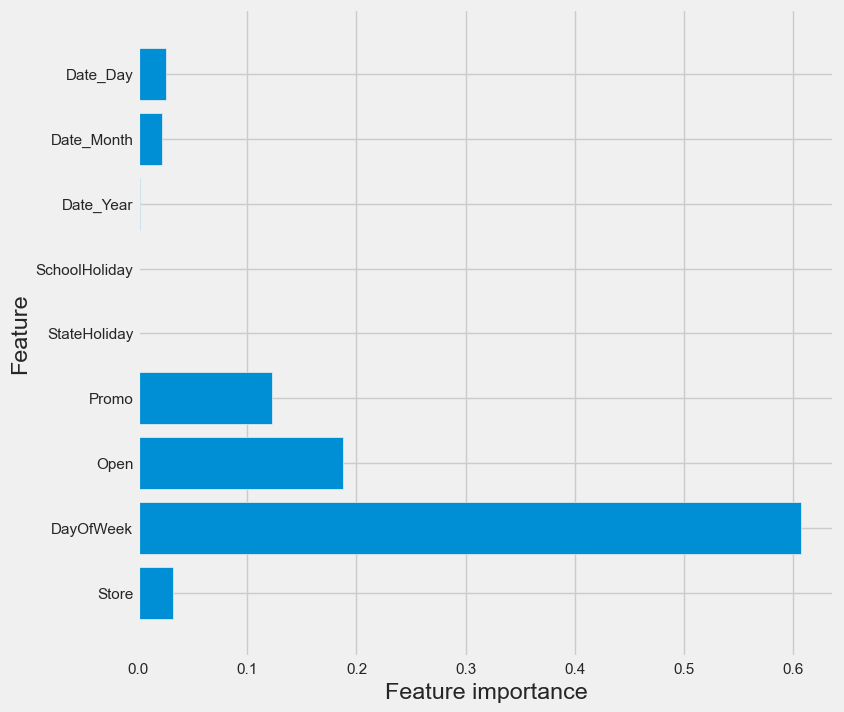

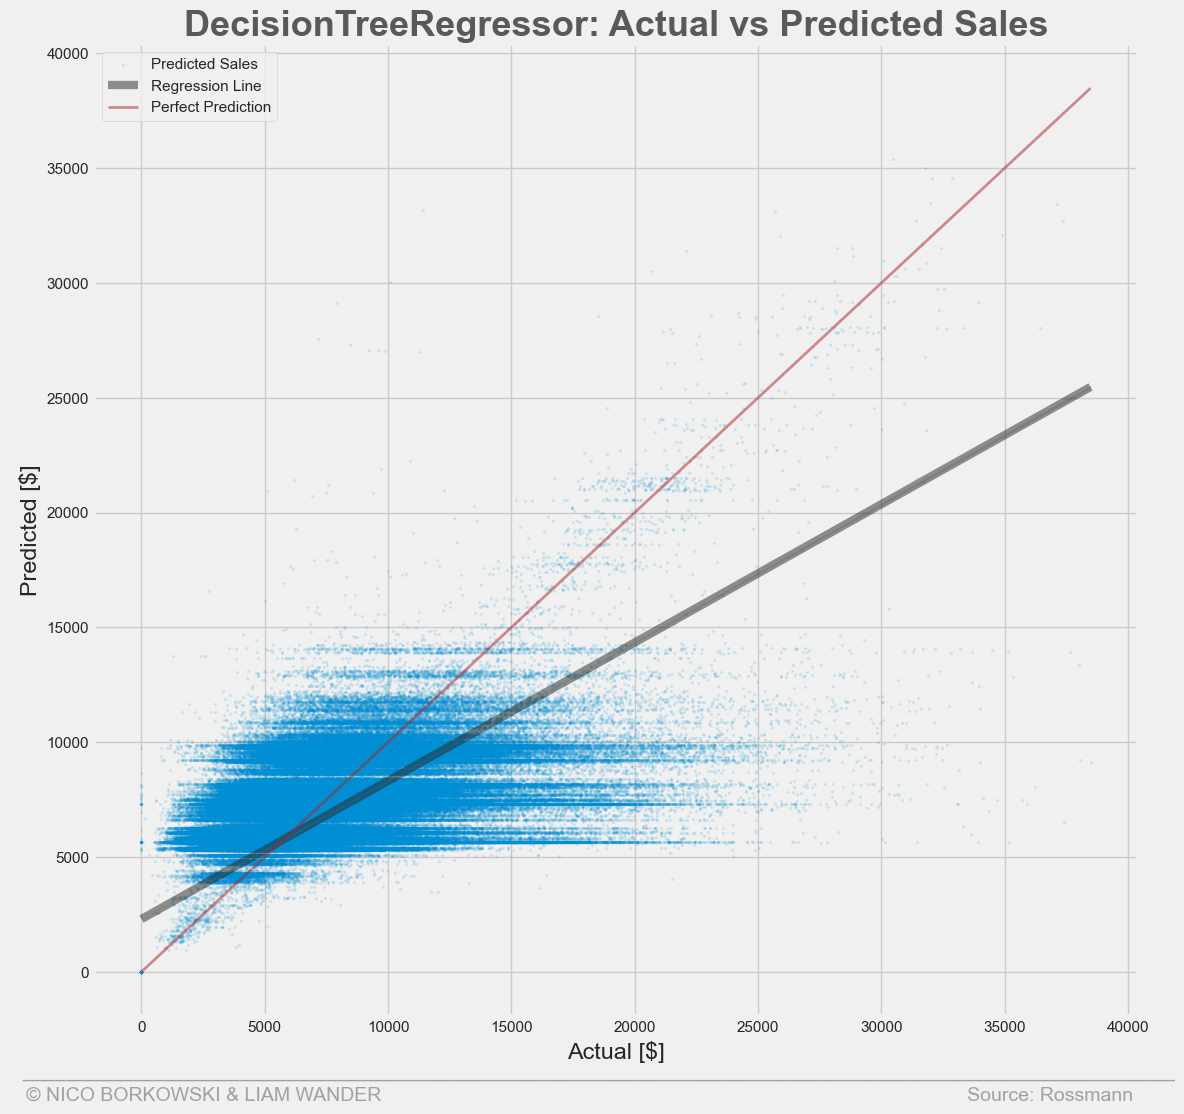

In [ ]:
dt = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=7, min_samples_split=7, random_state=42)
dt = train_evaluate(dt, X_train, y_train, X_test, y_test)
plot_feature_importance(dt)
plot_predicted_vs_actual(dt, X_train, y_train)

### 4.4 Tuning XGBoost

Training set score: 0.86
Test set score: 0.86
Average Error: 999.5601 degrees
RMSE = 1438.61


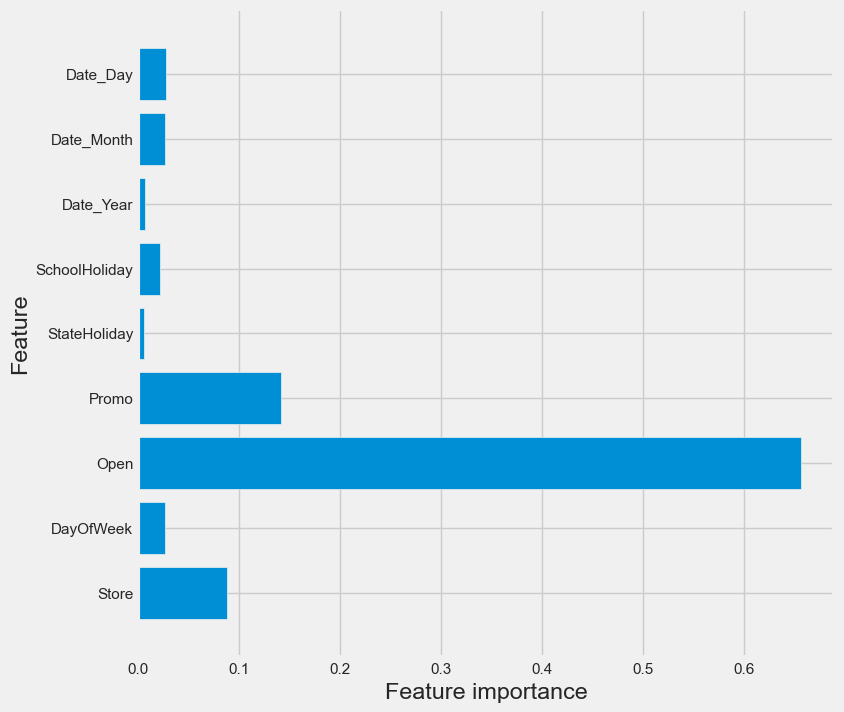

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END colsample_bytree=0.75, learning_rate=0.1, max_depth=2, min_child_weight=1, subsample=0.75; total time=   4.1s
[CV] END colsample_bytree=0.75, learning_rate=0.1, max_depth=2, min_child_weight=1, subsample=0.75; total time=   4.1s
[CV] END colsample_bytree=0.75, learning_rate=0.1, max_depth=2, min_child_weight=1, subsample=0.75; total time=   4.0s
[CV] END colsample_bytree=0.75, learning_rate=0.1, max_depth=2, min_child_weight=1, subsample=0.75; total time=   3.9s
[CV] END colsample_bytree=0.75, learning_rate=0.1, max_depth=2, min_child_weight=1, subsample=0.75; total time=   4.0s
[CV] END colsample_bytree=0.75, learning_rate=0.1, max_depth=2, min_child_weight=1, subsample=1; total time=   3.0s
[CV] END colsample_bytree=0.75, learning_rate=0.1, max_depth=2, min_child_weight=1, subsample=1; total time=   3.0s
[CV] END colsample_bytree=0.75, learning_rate=0.1, max_depth=2, min_child_weight=1, subsample=1; total time=   

In [ ]:
xgb = xgboost.XGBRegressor(random_state=42)

xgb = train_evaluate(xgb, X_train, y_train, X_test, y_test)

plot_feature_importance(xgb)

PARAMETERS = {"subsample":[0.75, 1],
              "colsample_bytree":[0.75, 1],
              "max_depth":[2, 6],
              "min_child_weight":[1, 5],
              "learning_rate":[0.1, 0.01]}

xgb_gscv = GridSearchCV(xgb, PARAMETERS, cv=5, verbose=2)
xgb_gscv.fit(X_train, y_train)
pprint(xgb_gscv.best_params_)

Training set score: 0.73
Test set score: 0.73
Average Error: 1376.7007 degrees
RMSE = 2012.41


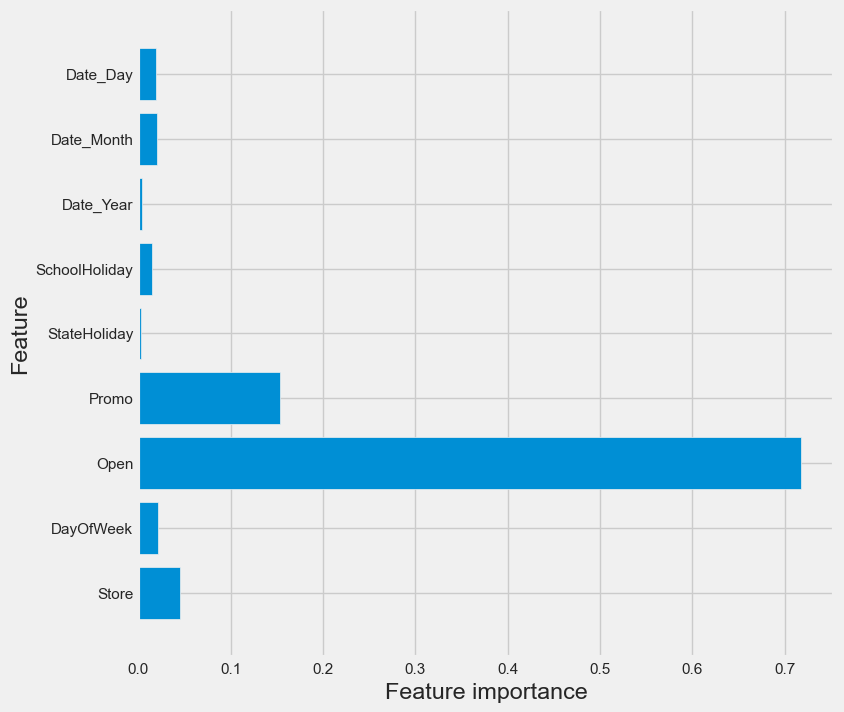

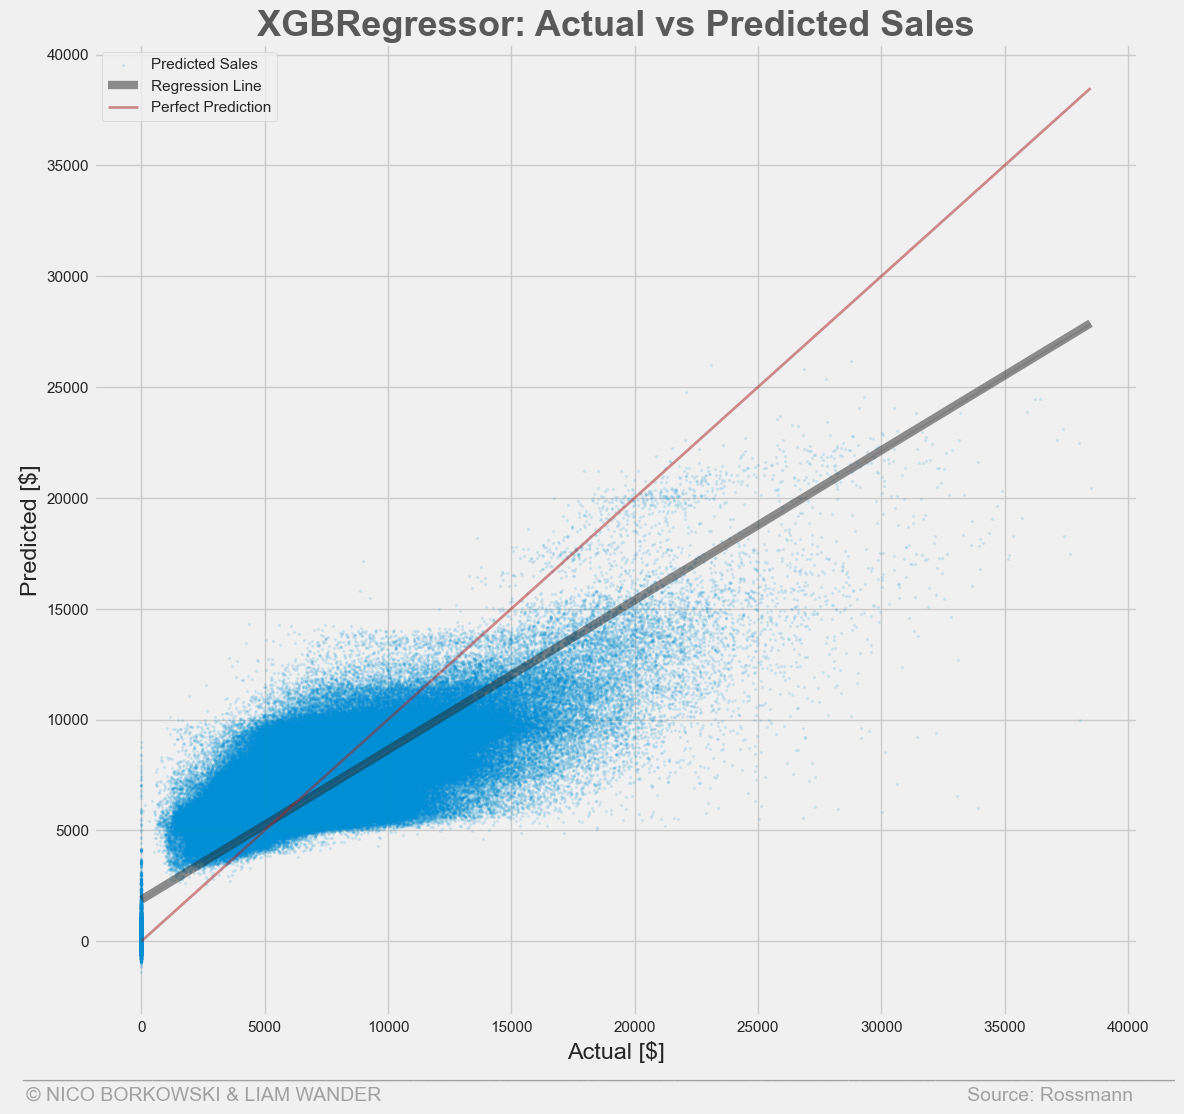

In [ ]:
xgb = xgboost.XGBRegressor(colsample_bytree=1, learning_rate=0.1, max_depth=6, min_child_weight=1, subsample=0.75, random_state=42)
xgb = train_evaluate(xgb, X_train, y_train, X_test, y_test)

plot_feature_importance(xgb)
plot_predicted_vs_actual(xgb, X_train, y_train)

## 5. Ensemble Method: Stacking

Während Bagging und Boosting homogene (gleich) schwache Lernmodelle für das Ensemble verwenden, berücksichtigt Stacking oft heterogene (unterschiedlich) schwache Lerner, lernt sie parallel und kombiniert sie durch Training eines Meta-Learners, um eine Vorhersage auf der Grundlage der verschiedenen schwachen Lerner-Vorhersagen auszugeben. Ein Meta-Lerner liest die Vorhersagen als Merkmale ein und das Ziel sind Grundwahrheitswerte. 

Bei einem Mittelwertbildungs-Ensemble (wie dem Random Forest) kombiniert das Modell die Vorhersagen von mehreren trainierten Modellen. Eine Einschränkung dieses Ansatzes besteht darin, dass jedes Modell den gleichen Beitrag zur Ensemble-Vorhersage leistet, unabhängig davon, wie gut das Modell abgeschnitten hat. Ein alternativer Ansatz ist ein gewichtetes Durchschnitts-Ensemble, bei dem der Beitrag der einzelnen Ensemble-Mitglieder nach dem Vertrauen in ihren Beitrag zu den besten Vorhersagen gewichtet wird. Das gewichtete Durchschnittsensemble bietet eine Verbesserung gegenüber dem Modell-Durchschnittsensemble.

Eine weitere Verallgemeinerung dieses Ansatzes besteht darin, die lineare gewichtete Summe durch lineare Regression (Regressionsproblem) oder logistische Regression (Klassifizierungsproblem) zu ersetzen, um die Vorhersagen der Teilmodelle mit einem beliebigen Lernalgorithmus zu kombinieren. Dieser Ansatz wird als Stacking bezeichnet.

> Beim Stacking nimmt ein Algorithmus die Ausgaben der Teilmodelle als Eingabe und versucht zu lernen, wie die Eingabevorhersagen am besten kombiniert werden können, um eine bessere Ausgabevorhersage zu erhalten.

[vgl. Ensemble Stacking for ML & DL](https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/)

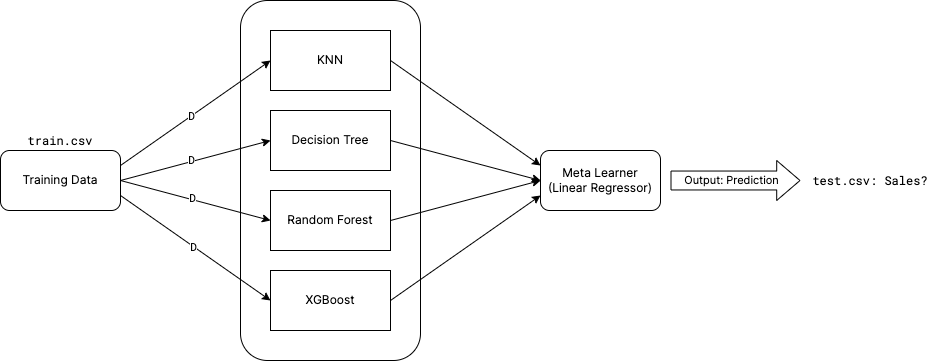

In [ ]:
Image(filename='img/stack.png') 

In [ ]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor(n_neighbors=4)))
    level0.append(('dt', DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=7, min_samples_split=7, random_state=42)))
    level0.append(('rf', RandomForestRegressor(random_state=42)))
    level0.append(('xgb', xgboost.XGBRegressor(colsample_bytree=1, learning_rate=0.1, max_depth=6, min_child_weight=1, subsample=0.75, random_state=42)))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor(n_neighbors=4)
    models['dt'] = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=7, min_samples_split=7, random_state=42)
    models['rf'] = RandomForestRegressor(random_state=42)
    models['xgb'] = xgboost.XGBRegressor(colsample_bytree=1, learning_rate=0.1, max_depth=6, min_child_weight=1, subsample=0.75, random_state=42)
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores


Mit dem stacking ensemble werden die Ergebnisse der einzelnen Modelle kombiniert. Hierfür wird ein Meta-Modell verwendet, welches die Vorhersagen der einzelnen Modelle als Features verwendet und die Vorhersage des Meta-Modells als Target. Das Meta-Modell lernt dann, wie die einzelnen Vorhersagen kombiniert werden müssen, um eine bessere Vorhersage zu erzielen. Hiermit wird weitergearbeitet.

## 6. Submission

Das ist mit Abstand der schwerste Teil, da ich kein richtiges Verfahren kenne wie ich aus dem test.csv-Datensatz Sales predicten könnte. Ein Stackingmodell bestehend aus KNN, Random Forest, Decision Tree und XGBoost sowie dem Meta-Modell Linear Regression liegt vor. Zunächst habe ich versucht das Modell mit den Inhalten aus train.csv (bis auf Sales) zu trainieren und dann dieses Modell auf einen test.csv Datensatz loszulassen. Doch bereits an der Umsetzung scheitert es, da ich X und y von test.csv nicht sinnvoll voneinander trennen kann (Sales ist eben nicht vorhanden). Meine Idee wäre es Sales aus train.csv mit der StoreID aus test.csv zu mappen um ein X DataFrame zu erhalten, was letztendlich sinnfrei ist.

-------knn-------
Coefficient of determination: 0.7162463225289641
Root Mean Squared Error: 2048.505625852676
>knn -2067.412 (14.105)
Computation Time: 10.356644868850708
----------------------------------

-------dt-------
Coefficient of determination: 0.6013632076185136
Root Mean Squared Error: 2428.035887122603
>dt -1604.212 (13.857)
Computation Time: 2.187535047531128
----------------------------------

-------rf-------
Coefficient of determination: 0.8438697077376422
Root Mean Squared Error: 1519.532516443564
>rf -1137.427 (18.569)
Computation Time: 444.54618096351624
----------------------------------

-------xgb-------
Coefficient of determination: 0.7271720981937316
Root Mean Squared Error: 2008.6802208972344
>xgb -1382.338 (12.970)
Computation Time: 1318.015912771225
----------------------------------

-------stacking-------
Coefficient of determination: 0.8607581954715812
Root Mean Squared Error: 1434.9977929530844
>stacking -1144.502 (15.713)
Computation Time: 2380.635970830

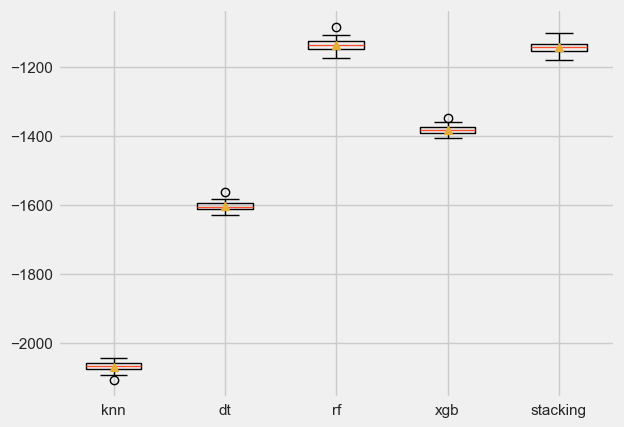

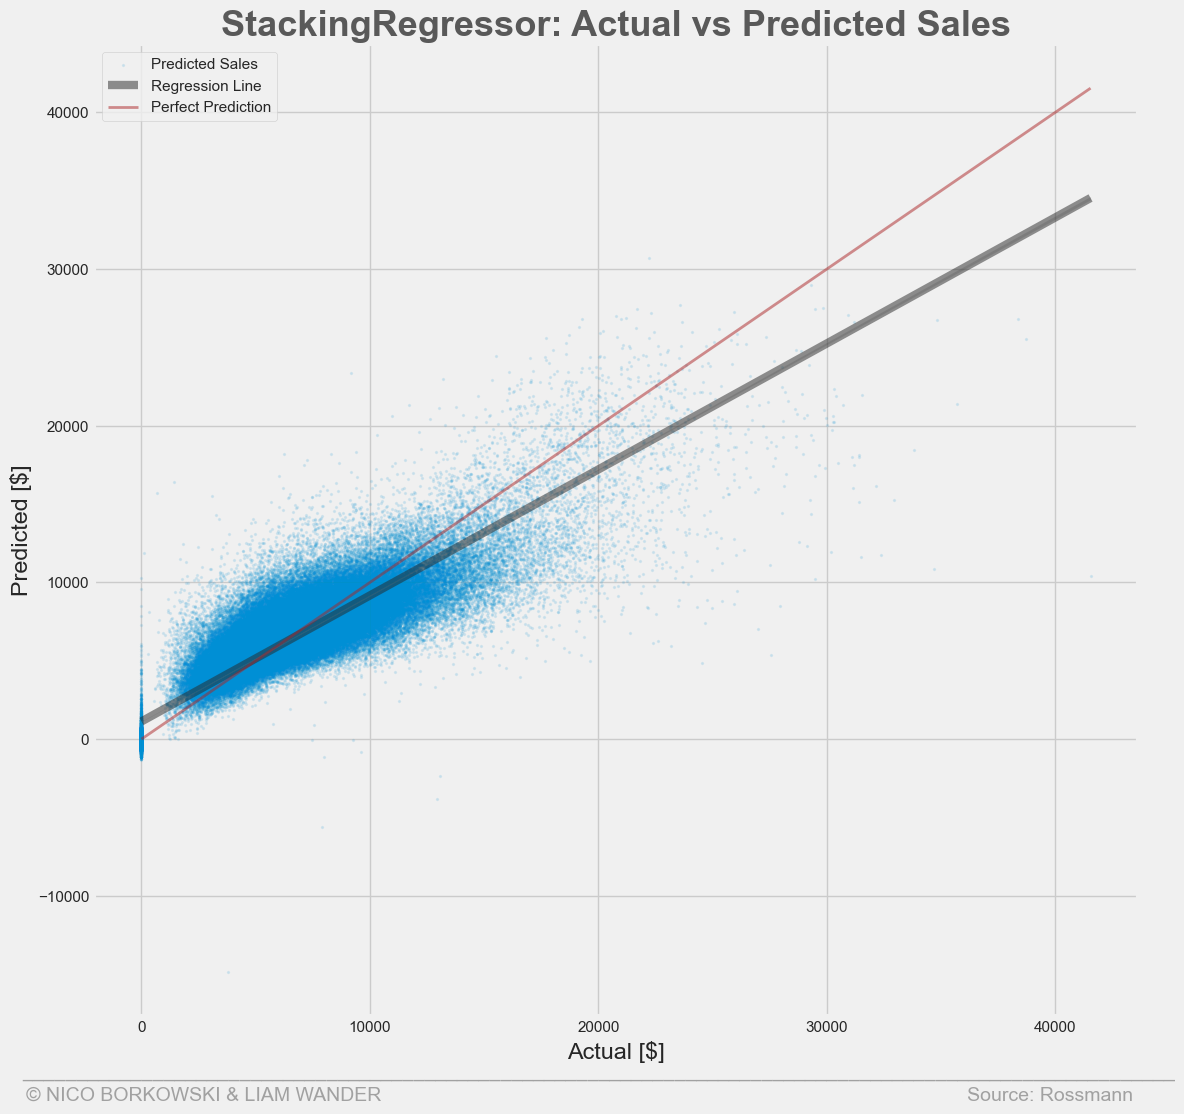

In [ ]:
models = get_models()
results, names = list(), list()

for name, model in models.items():
    start_time = time.time()
    scores = evaluate_model(model, X_test, y_test)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, prediction, squared = False)
    end_time = time.time()
    results.append(scores)
    names.append(name)
    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")
# plot each models performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

plot_predicted_vs_actual(models['stacking'], X_test, y_test)
test['Sales'] = models['stacking'].predict(test.drop('Id', axis=1))
test['Sales'] = test['Sales'].astype(int)
test = test.drop(['Date_Year', 'Date_Month', 'Date_Day'], axis=1)
test = test[['Id', 'Sales']]
test.to_csv('submission.csv', index=False)




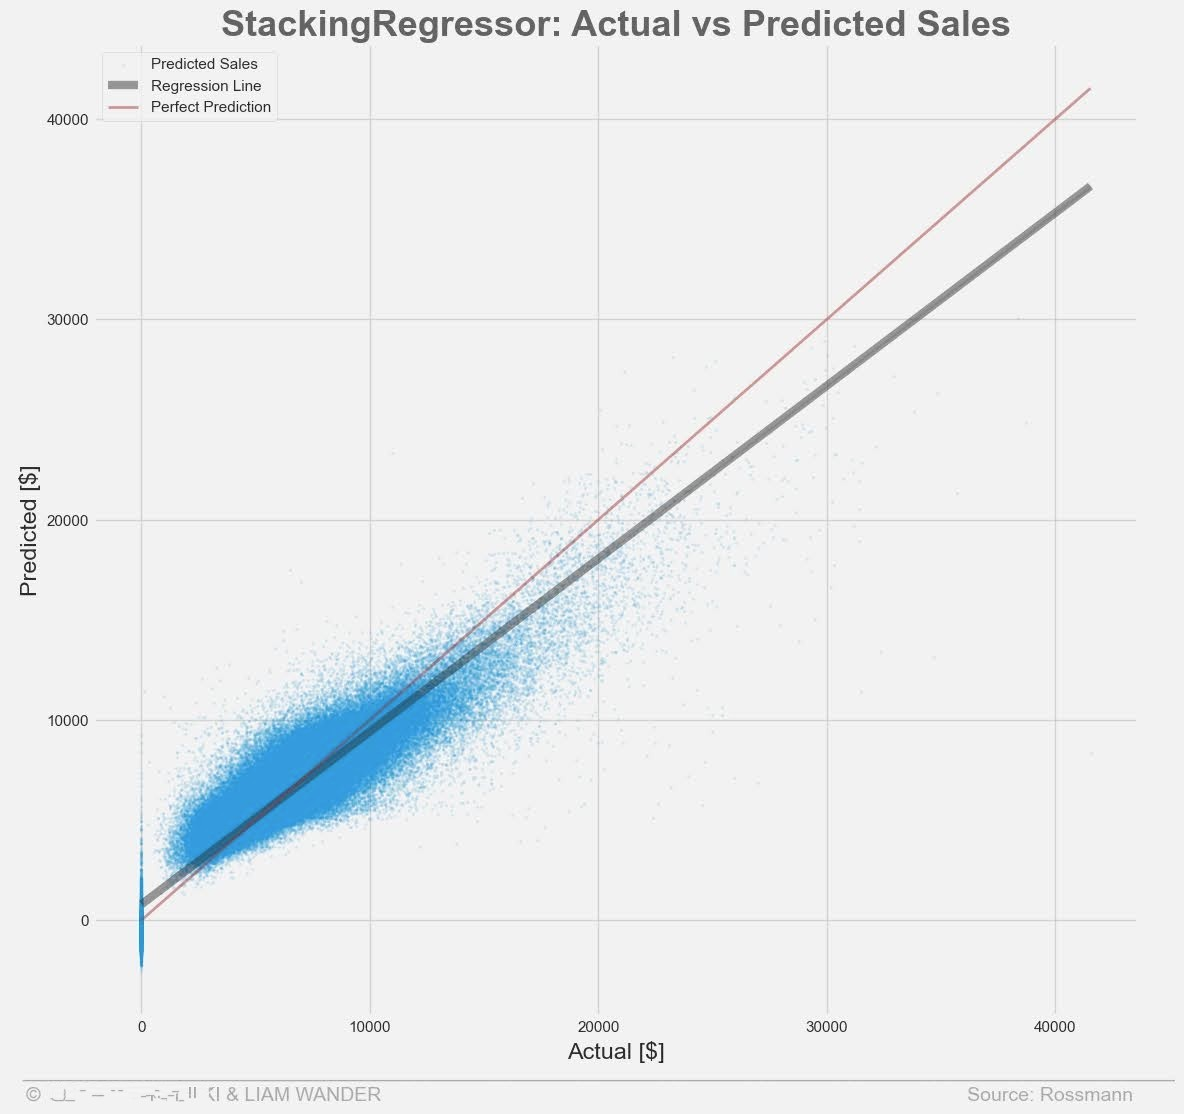

In [ ]:
Image(filename='img/actual-vs-predicted-basic-stack.png')

Die Vorhersagen de sStacking Ensembles mit den Basisparametern der einzelnen schwachen Modelle sind genauer als die, mit getunten Parametern. Das kamm daran liegen, dass die Modelle "überfitten" und die Vorhersagen nicht mehr auf die Realität zutreffen.

-------knn-------
Coefficient of determination: 0.7162463225289641
Root Mean Squared Error: 2048.505625852676
>knn -2067.412 (14.105)
Computation Time: 11.164736986160278
----------------------------------

-------dt-------
Coefficient of determination: 0.6013632076185136
Root Mean Squared Error: 2428.035887122603
>dt -1604.212 (13.857)
Computation Time: 2.1890459060668945
----------------------------------

-------rf-------
Coefficient of determination: 0.8438697077376422
Root Mean Squared Error: 1519.532516443564
>rf -1137.427 (18.569)
Computation Time: 425.89284682273865
----------------------------------

-------xgb-------
Coefficient of determination: 0.7271720981937316
Root Mean Squared Error: 2008.6802208972344
>xgb -1382.338 (12.970)
Computation Time: 67.77959179878235
----------------------------------

-------stacking-------
Coefficient of determination: 0.8607581954715812
Root Mean Squared Error: 1434.9977929530844
>stacking -1144.502 (15.713)
Computation Time: 2390.59928226

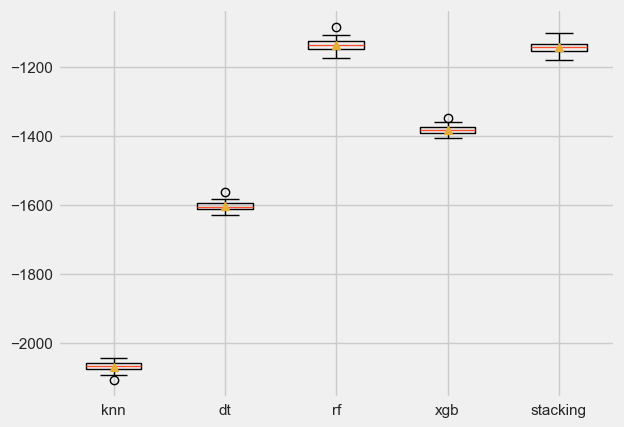

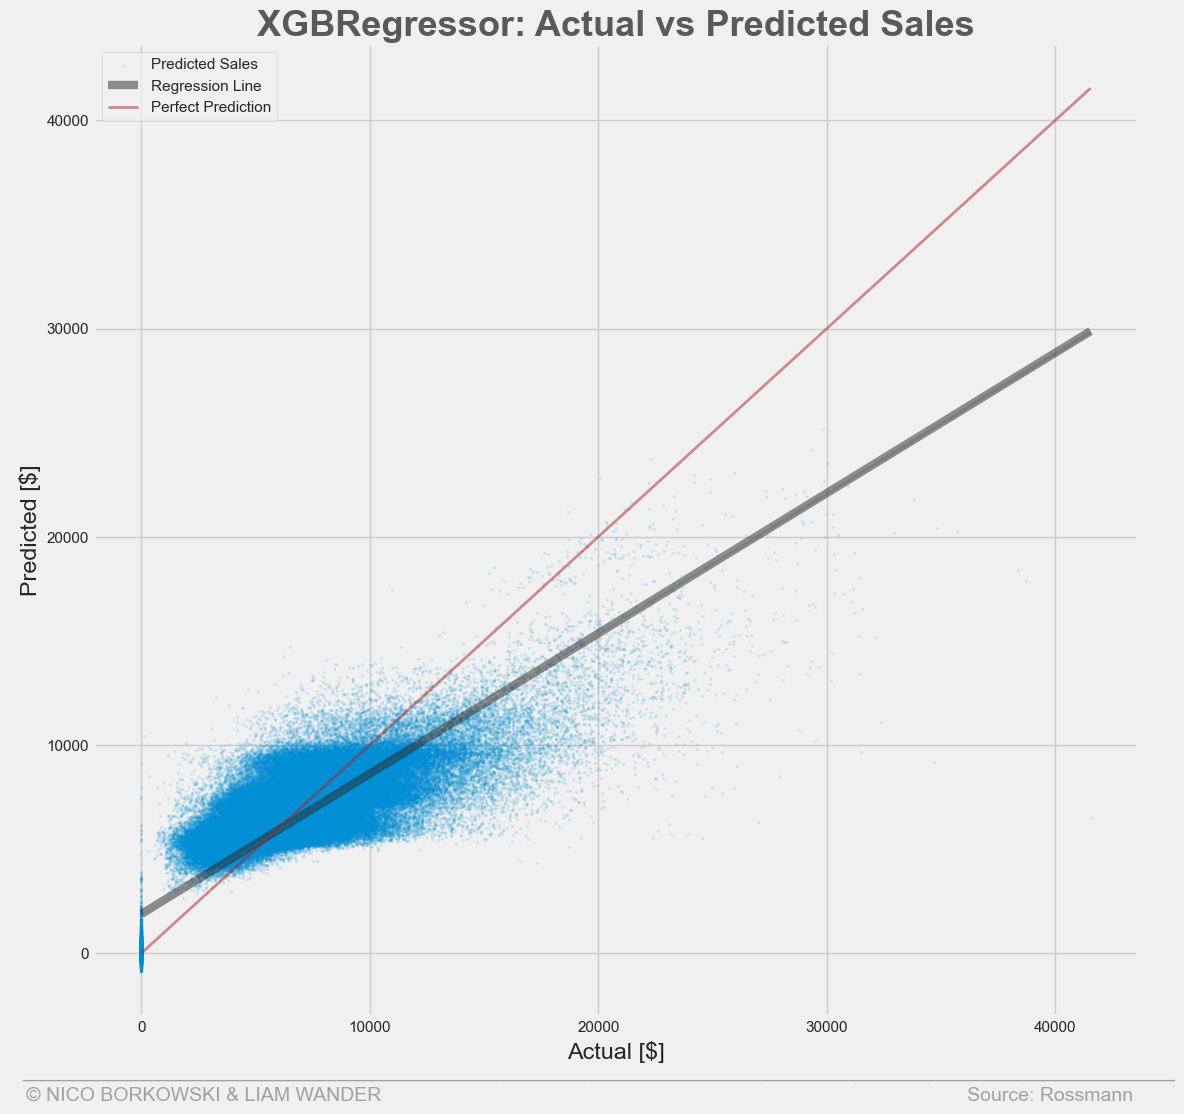

In [ ]:
models = get_models()
results, names = list(), list()

for name, model in models.items():
    start_time = time.time()
    scores = evaluate_model(model, X_test, y_test)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, prediction, squared = False)
    end_time = time.time()
    results.append(scores)
    names.append(name)
    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")
# plot each models performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

plot_predicted_vs_actual(models['xgb'], X_test, y_test)

test['Sales'] = models['xgb'].predict(test.drop('Id', axis=1))
test['Sales'] = test['Sales'].astype(int)
test = test.drop(['Date_Year', 'Date_Month', 'Date_Day'], axis=1)
test = test[['Id', 'Sales']]
test.to_csv('submission-xgb.csv', index=False)

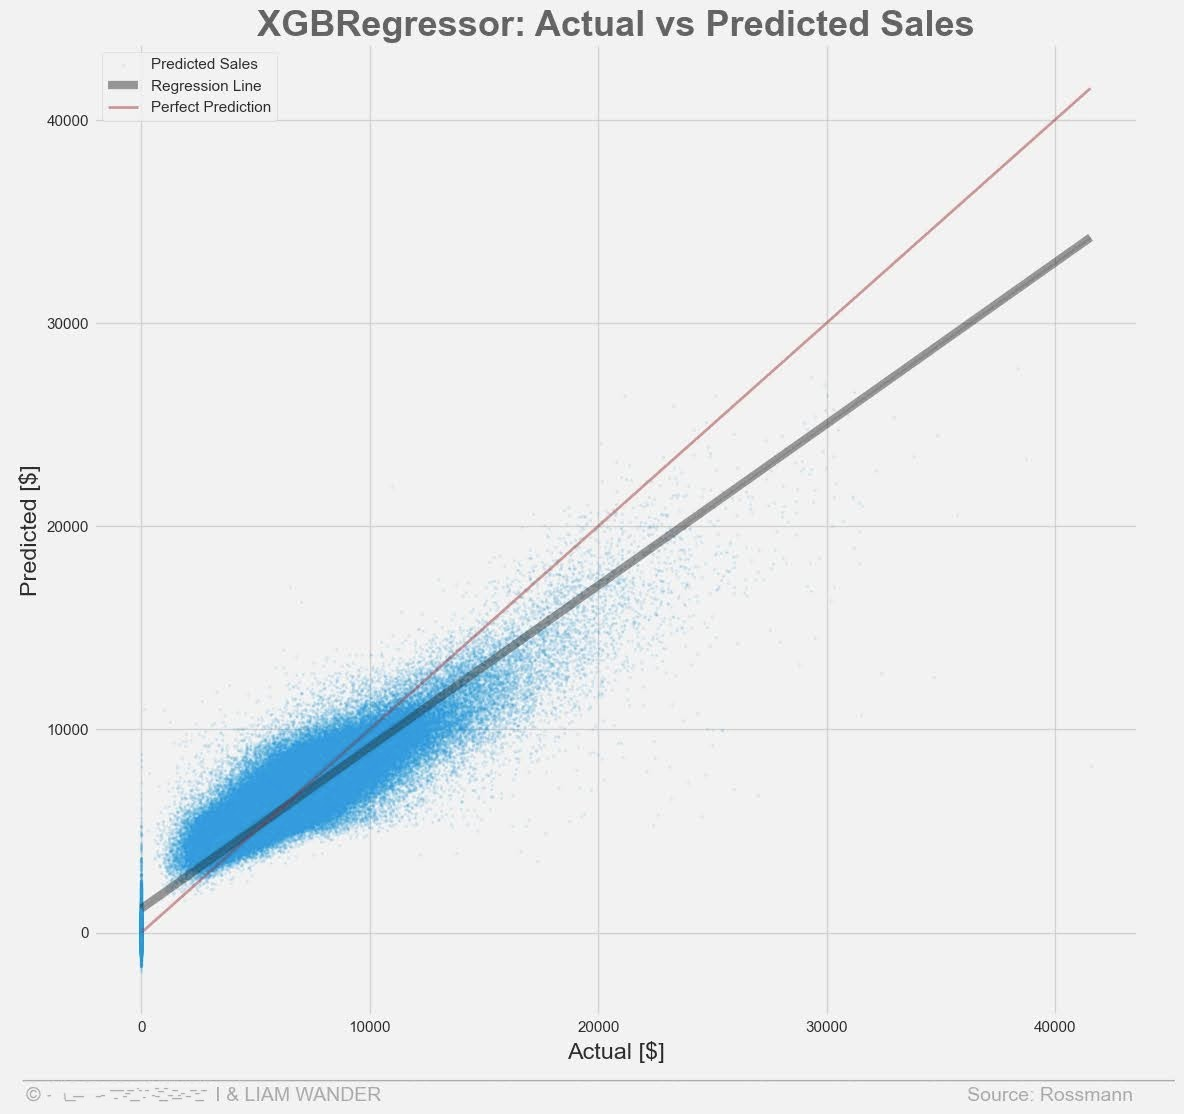

In [ ]:
Image(filename='img/actual-vs-predicted-basic-xgb.png')

Die Vorhersagen mit den Basisparametern des XGBoosting Verfahrens sind eindeutig näher an einer Perfekten Prediction als die Vorhersagen mit den getunten Parametern.

Nachdem ich unter DataCleaning (2) die Store Daten wieder entfernt habe, ist die Performance des Stacking Modells leider schlechter geworden. XGBoost belegt nun den 1. PLatz. Zuvor waren die mean scores vom stacking bei -888/std: 7,5 (ein paar commits früher), nun stehts bei -1040/std: 11,5

Deswegen nutze ich zum ersten Submit das stacking model - der zweite Versuch wird mit dem XGBoost Modell durchgeführt.

Persönliche Erkenntnis: Mit einem Hypertunging auf alle Modelle angewandt - schneidet das random Forest Modell am besten ab (Ergebnis mit Standardparametern siehe Fazit) Demnachzugehen; dazu fehlt mir gerade die Zeit. Ich möchte das hier nur anmerken, da ich es für wichtig halte.

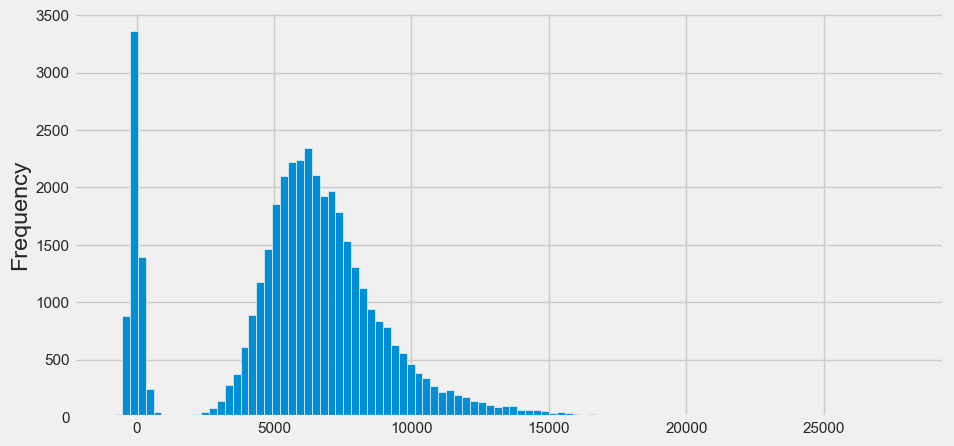

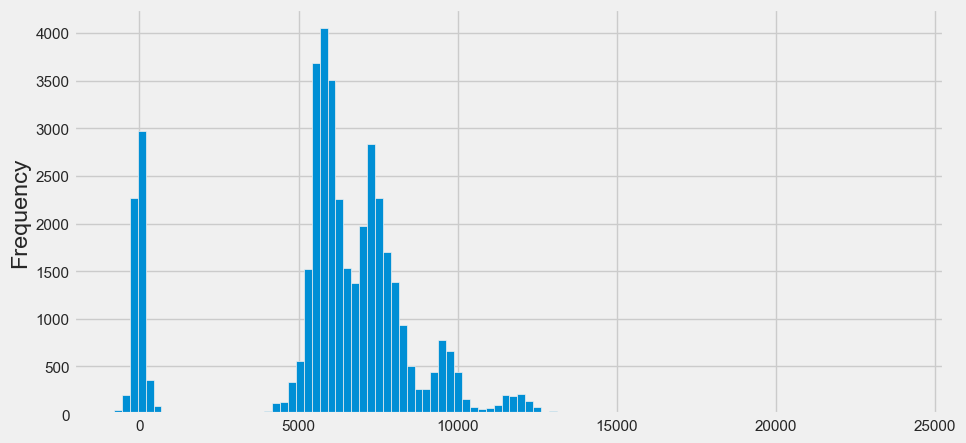

In [ ]:
# plot submission file
submission = pd.read_csv('submission.csv')
submission['Sales'].plot(kind='hist', bins=100, figsize=(10, 5))
plt.show()

# plot submission-xgb file
submission_xgb = pd.read_csv('submission-xgb.csv')
submission_xgb['Sales'].plot(kind='hist', bins=100, figsize=(10, 5))
plt.show()

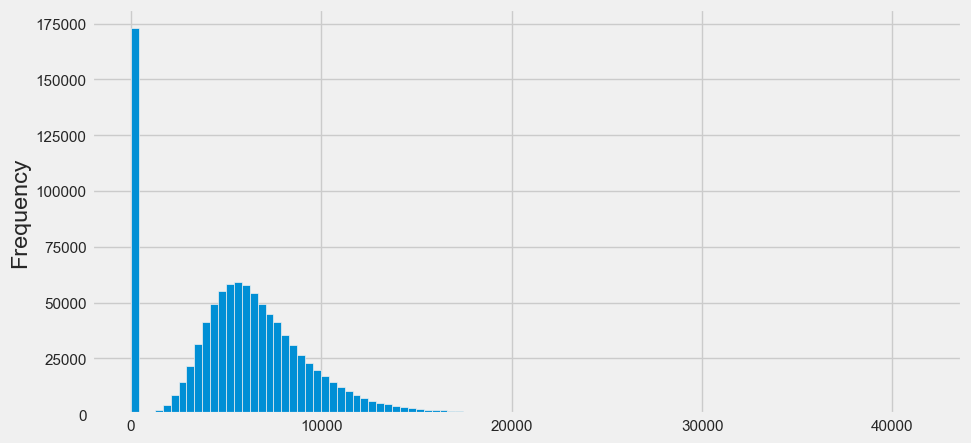

In [ ]:
# plot train file
train['Sales'].plot(kind='hist', bins=100, figsize=(10, 5))
plt.show()

Das Stacking modell kommt dem "Trainingsdatensatz" am nächsten. Zumindest was das Histogramm und dessen beinahre Glockenform angeht.

Vielleicht sind die negativen Umsätze unter "0" zusammengefasst - im Train Datensatz.

Der Score vom XGBoost Modell liegt bei etwa 0.27 und der vom Stacking Modell bei 0.25. Das Stacking Modell ist also dennoch etwas besser! Im Leaderboard würde ich allerdings etwa auf Rang 2850 stehen - sicherlich bedarf es noch einiger Optimierungen...

## 7. Fazit

Vorangegangen ist ein ewiges Hin- und Her zwischen etwaiger Lösungsfindung, Troubleshooting, dem Bekämpfen von Bugs und häufiger Erleichterung wenn man vermeintlich dem "Ziel" näher gekommen ist (was auch immer das Ziel ist). Dem folgt zu guter Letzt noch ein Insight, dass uns während der Arbeit aufgefallen ist: Manchmal sind die Standardparameter einfach optimaler als "getunte" Hyperparameter - Es folgt ein Vergleich zwischen den Basic und getunten Scores der Submissions XGB und Stacking Ensemble. Zudem ein Vergleich der Scores der einzelnen Modelle in Reinform.

In [ ]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor(n_neighbors=4)))
    level0.append(('dt', DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=7, min_samples_split=7, random_state=42)))
    level0.append(('rf', RandomForestRegressor(random_state=42)))
    level0.append(('xgb', xgboost.XGBRegressor(colsample_bytree=1, learning_rate=0.1, max_depth=6, min_child_weight=1, subsample=0.75, random_state=42)))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor(n_neighbors=4)
    models['dt'] = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=7, min_samples_split=7, random_state=42)
    models['rf'] = RandomForestRegressor(random_state=42)
    models['xgb'] = xgboost.XGBRegressor(colsample_bytree=1, learning_rate=0.1, max_depth=6, min_child_weight=1, subsample=0.75, random_state=42)
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores


-------knn-------
Coefficient of determination: 0.7162463225289641
Root Mean Squared Error: 2048.505625852676
>knn -2067.412 (14.105)
Computation Time: 11.91905403137207
----------------------------------

-------dt-------
Coefficient of determination: 0.6013632076185136
Root Mean Squared Error: 2428.035887122603
>dt -1604.212 (13.857)
Computation Time: 2.6255929470062256
----------------------------------

-------rf-------
Coefficient of determination: 0.8438697077376422
Root Mean Squared Error: 1519.532516443564
>rf -1137.427 (18.569)
Computation Time: 478.34397196769714
----------------------------------

-------xgb-------
Coefficient of determination: 0.7271720981937316
Root Mean Squared Error: 2008.6802208972344
>xgb -1382.338 (12.970)
Computation Time: 74.67361807823181
----------------------------------

-------stacking-------
Coefficient of determination: 0.8607581954715812
Root Mean Squared Error: 1434.9977929530844
>stacking -1144.502 (15.713)
Computation Time: 2596.349185943

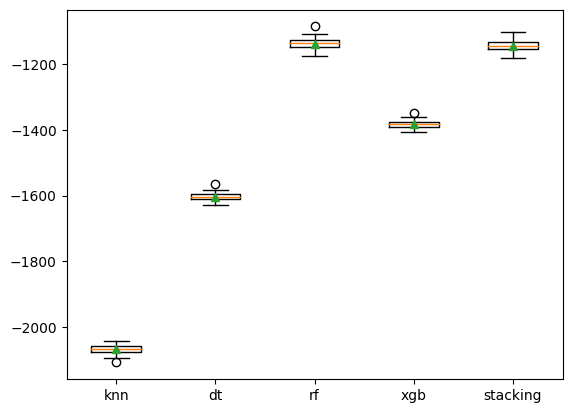

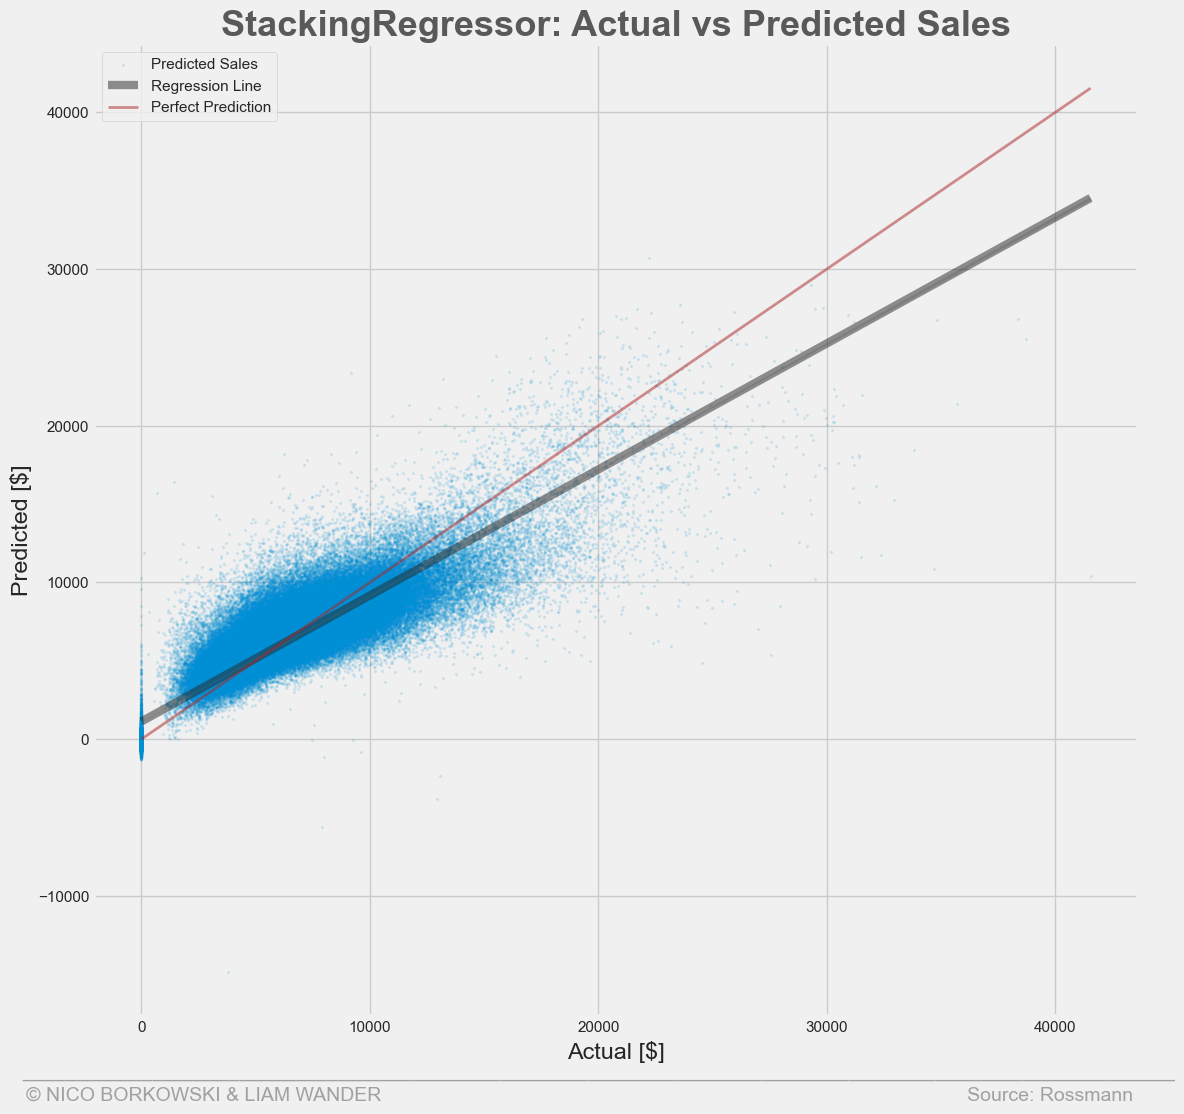

In [ ]:
models = get_models()
results, names = list(), list()

for name, model in models.items():
    start_time = time.time()
    scores = evaluate_model(model, X_test, y_test)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, prediction, squared = False)
    end_time = time.time()
    results.append(scores)
    names.append(name)
    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")
# plot each models performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

plot_predicted_vs_actual(models['stacking'], X_test, y_test)


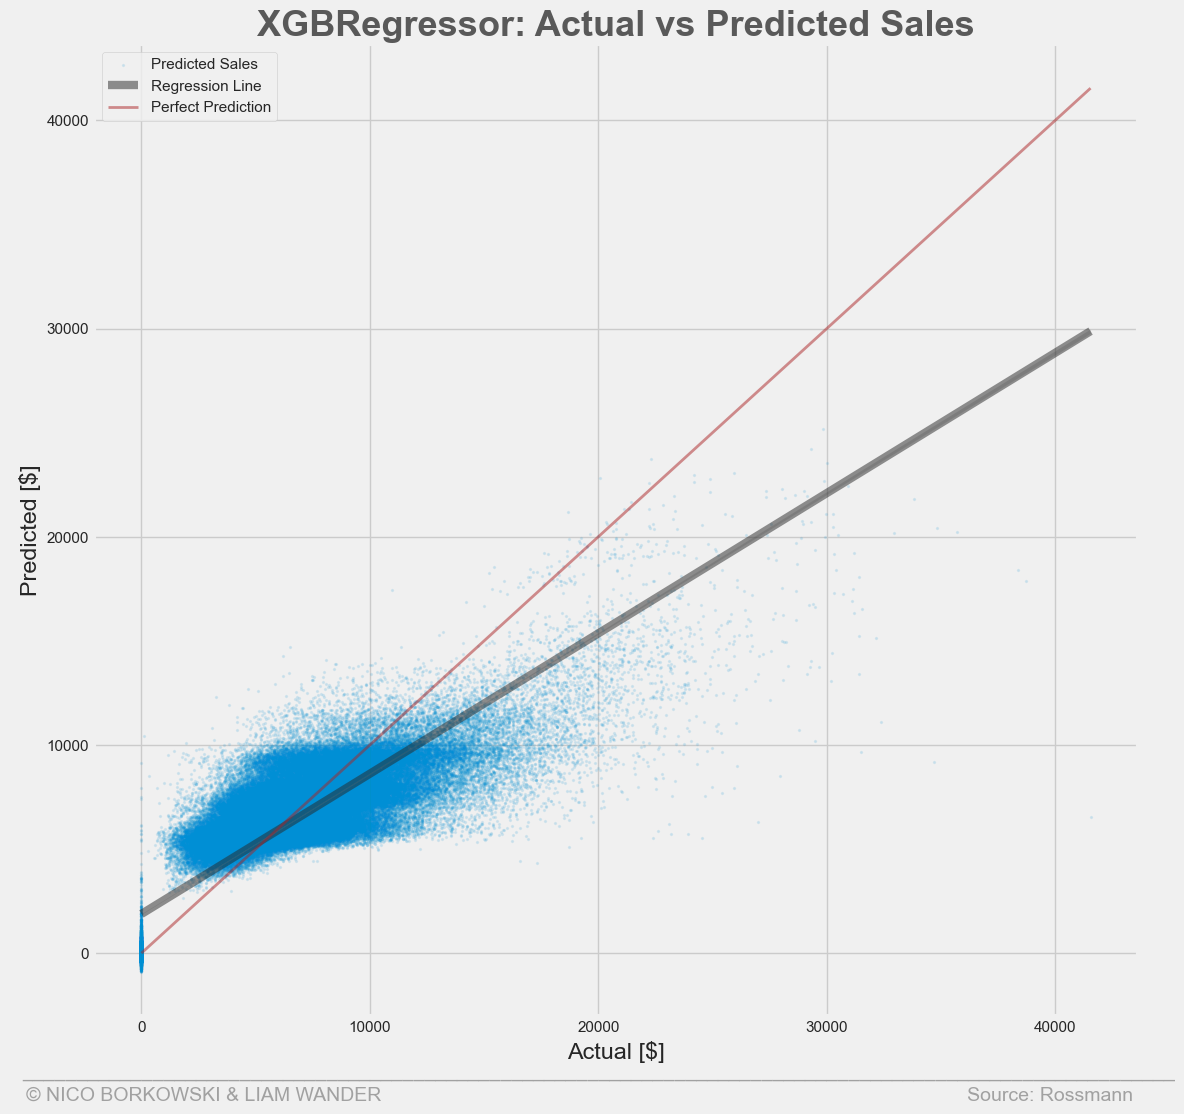

In [ ]:
plot_predicted_vs_actual(models['xgb'], X_test, y_test)

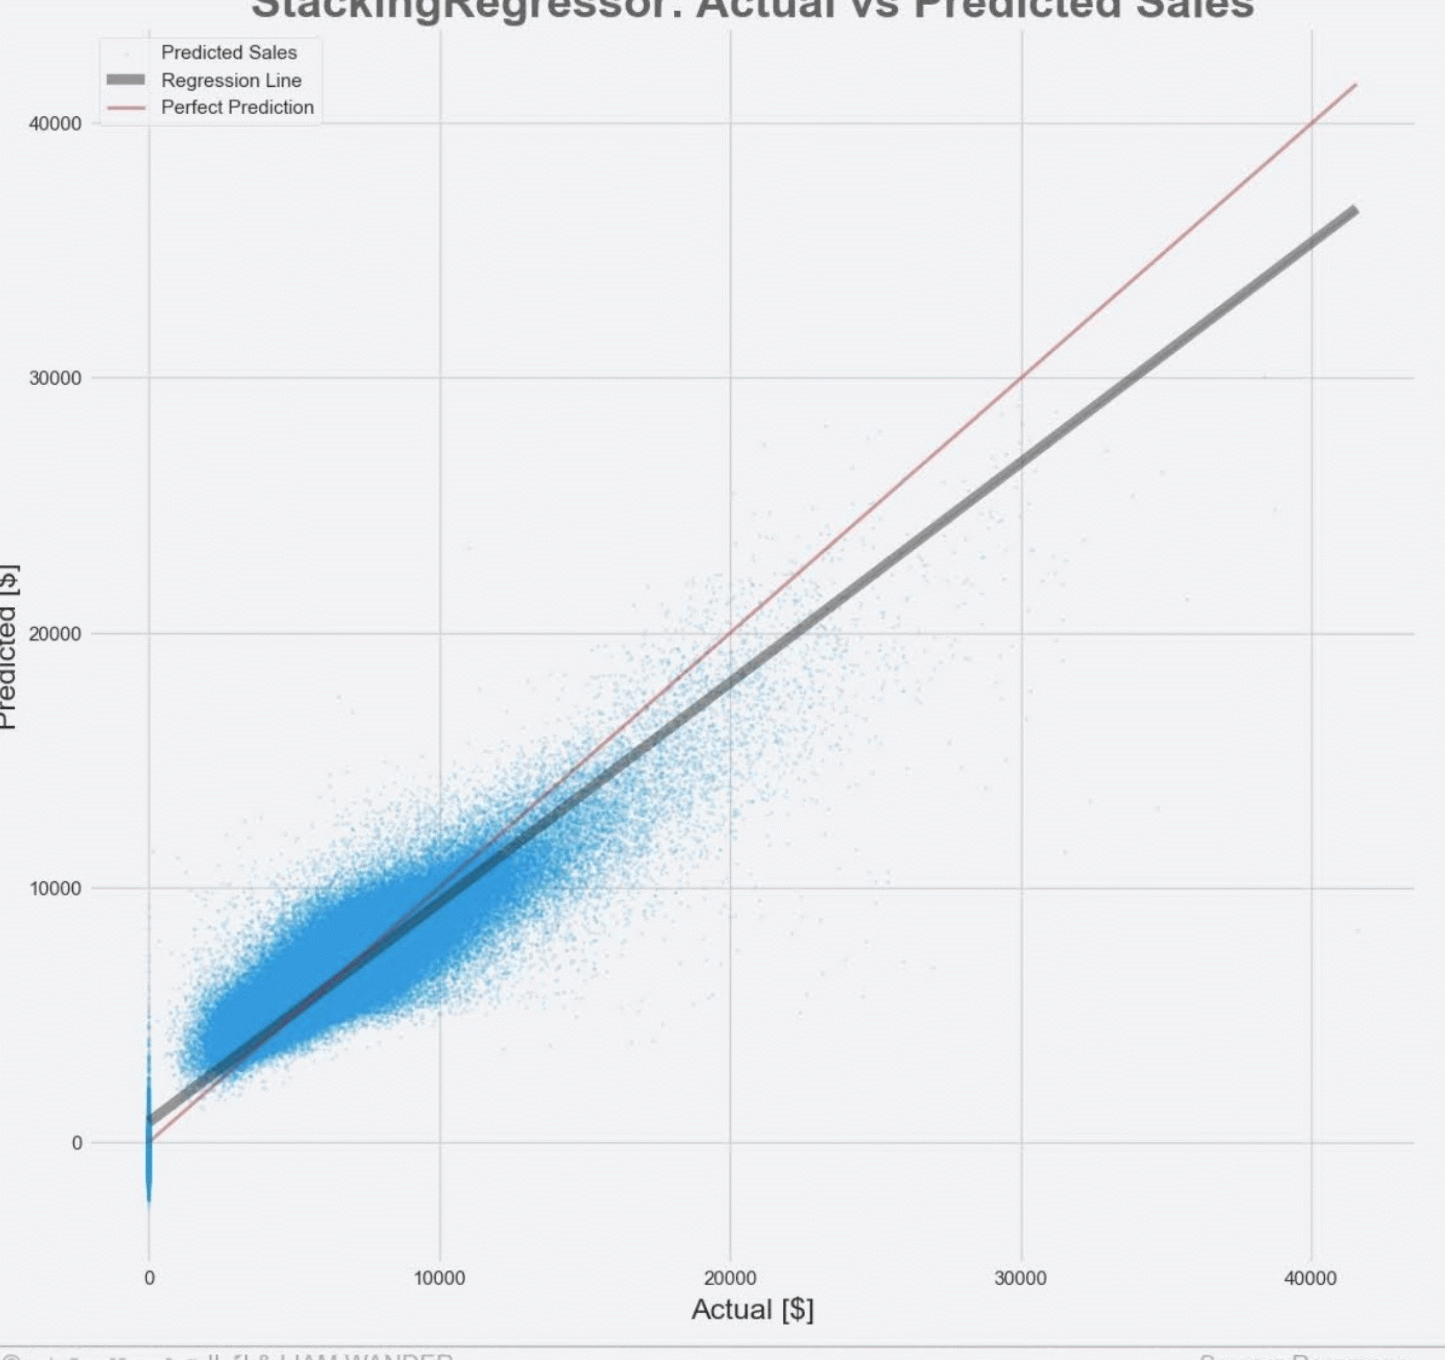

In [ ]:
Image(filename='img/PXL-ANIMATION.gif')

Anhand dieser Graphen erkennen wir, dass die Basisparameter beim XGBoost, als auch beim Stacking Ensemble besser sind als die getunten Hyperparameter. 

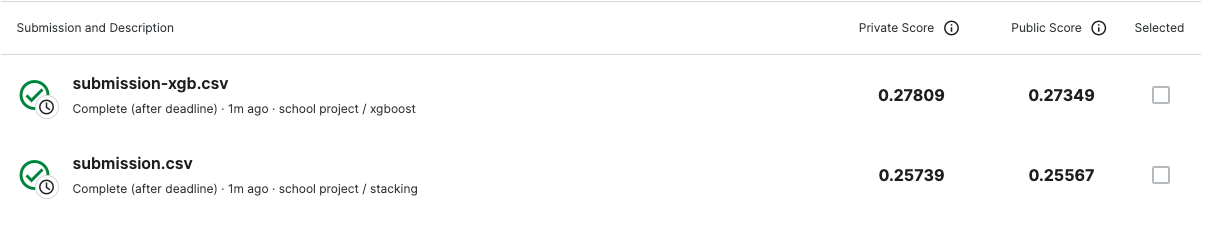

In [ ]:
Image(filename='img/scores-with-base-models.png')

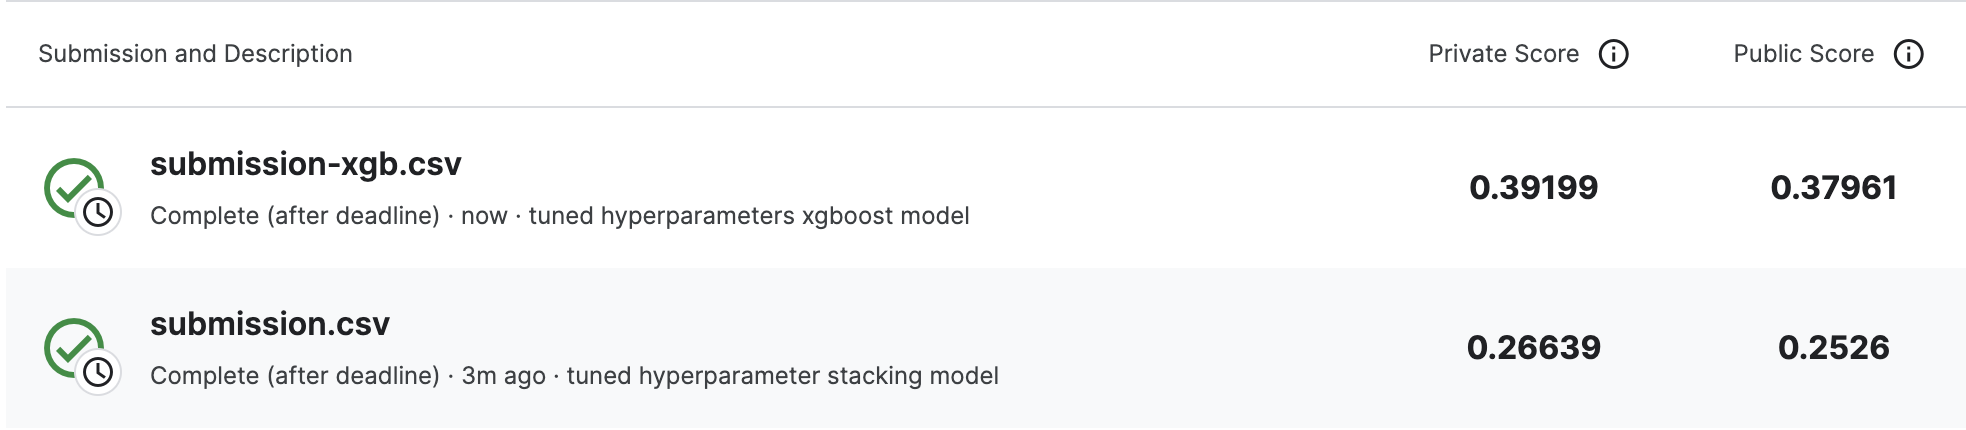

In [ ]:
Image(filename='img/scores-with-tuned-models.png')

Einzig das getunte Stacking Ensemble schneidet bei der test.csv im Public score einen Tick besser ab als mit den Standardparametern.